In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import standarizing

In [2]:
df = pd.read_csv('train_data.csv', encoding='utf-8', error_bad_lines=False)
df.head()

b'Skipping line 5856: expected 40 fields, saw 70\nSkipping line 7939: expected 40 fields, saw 49\n'


BBLE  BORO  BLOCK   LOT EASEMENT                OWNER BLDGCL  \
0  1001791101     1    179  1101      NaN  155 FRANKLIN ST LLC     RK   
1  1000163436     1     16  3436      NaN         BROADLAR LLC     R4   
2  1000761255     1     76  1255      NaN         HAM, RICHARD     R4   
3  1000161179     1     16  1179      NaN        SHIM, HAE JIN     R4   
4  1001751526     1    175  1526      NaN        BRIT GIRL LLC     R4   

  TAXCLASS  LTFRONT  LTDEPTH  ... VALTYPE    Borough   Latitude  Longitude  \
0        4        0        0  ...   AC-TR  MANHATTAN  40.719232 -74.008095   
1        2        0        0  ...   AC-TR  MANHATTAN  40.709270 -74.016487   
2        2        0        0  ...   AC-TR  MANHATTAN  40.708006 -74.006164   
3        2        0        0  ...   AC-TR  MANHATTAN  40.709506 -74.018002   
4        2        0        0  ...   AC-TR  MANHATTAN  40.718024 -74.003903   

   Community Board  Council District  Census Tract        BIN  \
0            101.0               1.0          33.0  1002013.0   
1            101.0               1.0       31704.0  1000053.0   
2            101.0               1.0        1502.0  1087867.0   
3            101.0               1.0       31704.0  1000061.0   
4            101.0               1.0          33.0  1001937.0   

                                      NTA      New Georeferenced Column  
0  SoHo-TriBeCa-Civic Center-Little Italy  POINT (-74.008095 40.719232)  
1       Battery Park City-Lower Manhattan   POINT (-74.016487 40.70927)  
2       Battery Park City-Lower Manhattan  POINT (-74.006164 40.708006)  
3       Battery Park City-Lower Manhattan  POINT (-74.018002 40.709506)  
4  SoHo-TriBeCa-Civic Center-Little Italy  POINT (-74.003903 40.718024)  

[5 rows x 40 columns]

In [3]:
df['FULLVAL'].mean()

1335495.8509961492

In [4]:
df['FULLVAL'].std()

9803228.325752428

In [5]:
df['FULLVAL'].min()

0

In [6]:
df['FULLVAL'].max()

462001000

In [7]:
(df['FULLVAL'] > 10_000_000).sum()

135

In [8]:
(df['FULLVAL'] <= 0).sum()

226

In [9]:
((df['FULLVAL'] <= 100_000) & (df['FULLVAL'] > 0)).sum()

668

In [10]:
length = len(df)
length

11946

In [11]:
y_log = np.log(df['FULLVAL'])
y_log[y_log < -3] = 0
(y_log == 0).sum()

C:\Users\Lasze\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


226

(array([2.260e+02, 0.000e+00, 8.000e+00, 5.300e+01, 1.340e+02, 7.810e+02,
        9.048e+03, 1.535e+03, 1.320e+02, 2.900e+01]),
 array([ 0.        ,  1.99510776,  3.99021552,  5.98532328,  7.98043105,
         9.97553881, 11.97064657, 13.96575433, 15.96086209, 17.95596985,
        19.95107761]),
 <BarContainer object of 10 artists>)

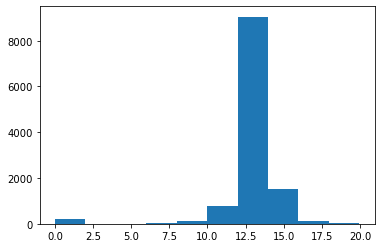

In [12]:
plt.hist(y_log)

(array([1.191e+04, 1.600e+01, 7.000e+00, 4.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([0.000000e+00, 4.620010e+07, 9.240020e+07, 1.386003e+08,
        1.848004e+08, 2.310005e+08, 2.772006e+08, 3.234007e+08,
        3.696008e+08, 4.158009e+08, 4.620010e+08]),
 <BarContainer object of 10 artists>)

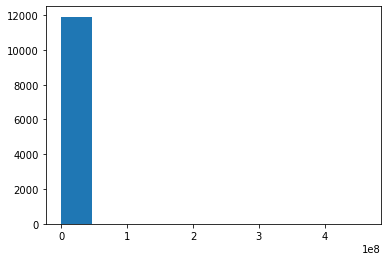

In [13]:
plt.hist(df['FULLVAL'])

In [14]:
df['FULLVAL']

0        3463000
1         247784
2         173338
3         184550
4         559937
          ...   
11941     407000
11942     244285
11943     298000
11944     459000
11945     557000
Name: FULLVAL, Length: 11946, dtype: int64

BBLE -> 1.0 (11946 uniques) [1, 1, 1, 1, 1] [1, 1, 1, 1, 1]


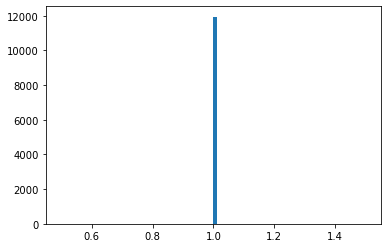

OWNER -> 0.9238238741001172 (11036 uniques) [71, 53, 34, 29, 22] [1, 1, 1, 1, 1]


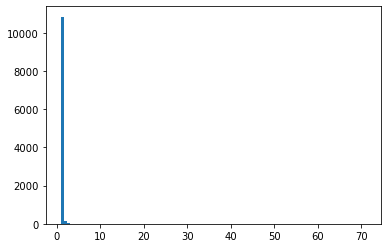

STADDR -> 0.8150008371002846 (9736 uniques) [49, 46, 43, 41, 41] [1, 1, 1, 1, 1]


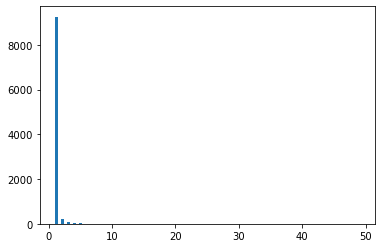

New Georeferenced Column -> 0.7874602377364809 (9407 uniques) [49, 46, 43, 41, 41] [1, 1, 1, 1, 1]


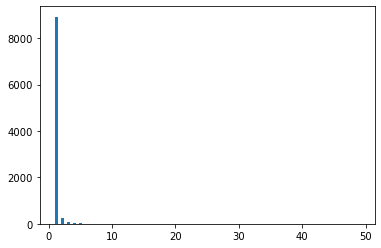

BIN -> 0.7701322618449691 (9200 uniques) [116, 49, 46, 43, 42] [1, 1, 1, 1, 1]


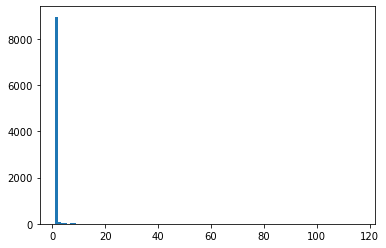

Latitude -> 0.7621798091411351 (9105 uniques) [49, 46, 43, 41, 41] [1, 1, 1, 1, 1]


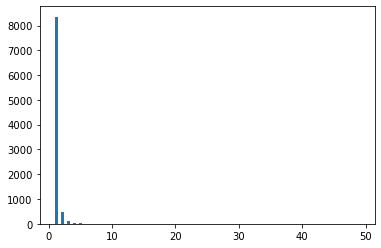

Longitude -> 0.7533902561526871 (9000 uniques) [49, 46, 43, 41, 41] [1, 1, 1, 1, 1]


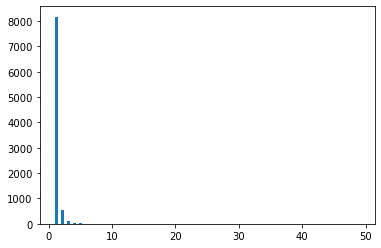

AVLAND -> 0.6347731458228696 (7583 uniques) [226, 26, 25, 21, 19] [1, 1, 1, 1, 1]


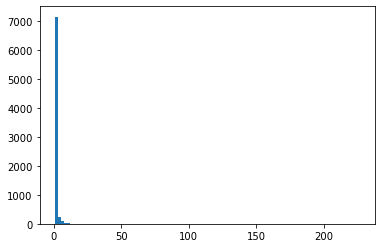

AVTOT -> 0.565796082370668 (6759 uniques) [226, 28, 27, 25, 24] [1, 1, 1, 1, 1]


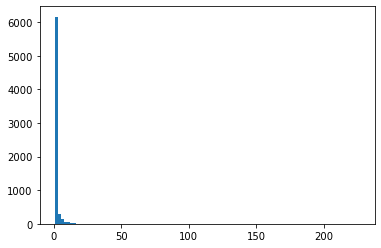

FULLVAL -> 0.39829231541938726 (4758 uniques) [226, 33, 29, 28, 26] [1, 1, 1, 1, 1]


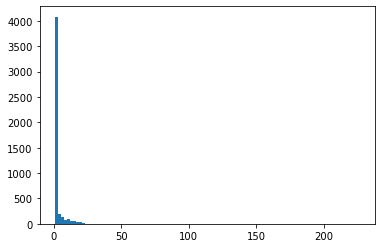

AVTOT2 -> 0.27473631341034654 (3282 uniques) [17, 15, 10, 9, 9] [1, 1, 1, 1, 1]


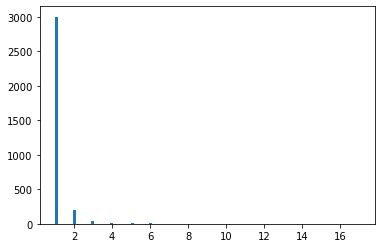

AVLAND2 -> 0.22970031809810815 (2744 uniques) [17, 17, 16, 16, 14] [1, 1, 1, 1, 1]


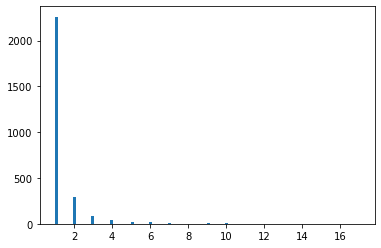

EXTOT -> 0.19387242591662482 (2316 uniques) [5953, 2365, 425, 261, 103] [1, 1, 1, 1, 1]


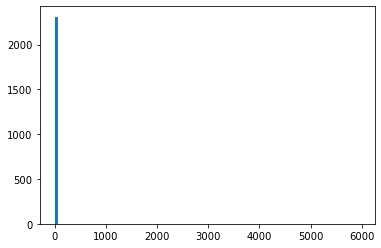

BLOCK -> 0.16993135777666166 (2030 uniques) [403, 380, 91, 79, 72] [1, 1, 1, 1, 1]


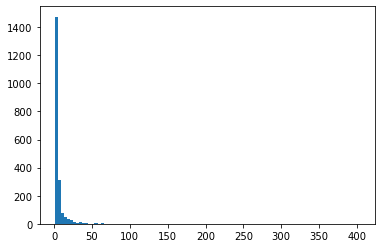

LOT -> 0.14557173949439142 (1739 uniques) [214, 121, 113, 112, 106] [1, 1, 1, 1, 1]


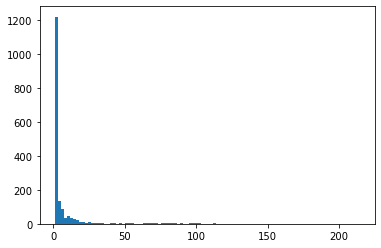

EXLAND -> 0.1392934873597857 (1664 uniques) [6733, 2200, 449, 208, 107] [1, 1, 1, 1, 1]


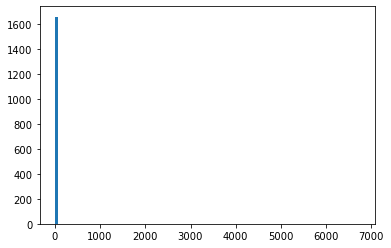

EXTOT2 -> 0.124644232379039 (1489 uniques) [79, 18, 15, 14, 12] [1, 1, 1, 1, 1]


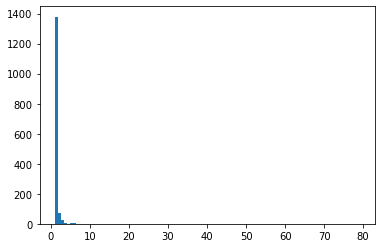

EXLAND2 -> 0.07575757575757576 (905 uniques) [88, 16, 15, 8, 5] [1, 1, 1, 1, 1]


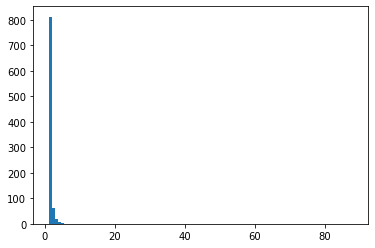

LTDEPTH -> 0.030219320274568893 (361 uniques) [3866, 2820, 250, 221, 212] [1, 1, 1, 1, 1]


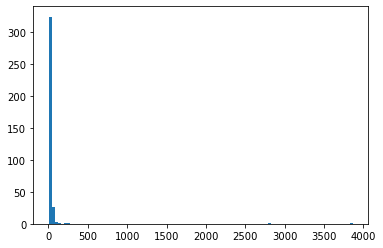

LTFRONT -> 0.028963669847647748 (346 uniques) [2425, 1049, 1030, 856, 353] [1, 1, 1, 1, 1]


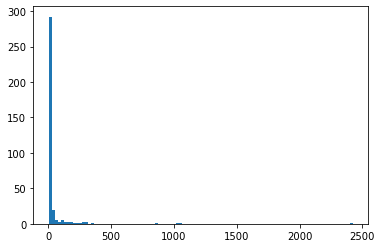

Census Tract -> 0.018667336346894357 (223 uniques) [585, 460, 429, 361, 358] [1, 1, 1, 1, 1]


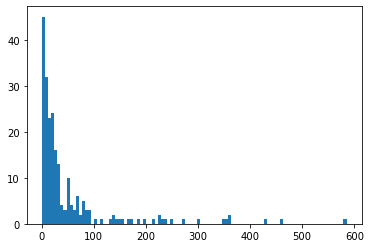

BLDFRONT -> 0.017997656119203082 (215 uniques) [3040, 1316, 764, 656, 619] [1, 1, 1, 1, 1]


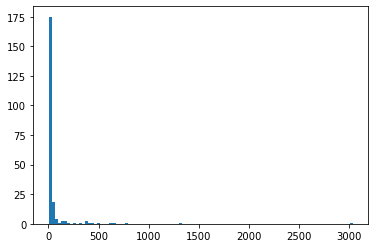

BLDDEPTH -> 0.01791394609074167 (214 uniques) [3031, 481, 427, 373, 370] [1, 1, 1, 1, 1]


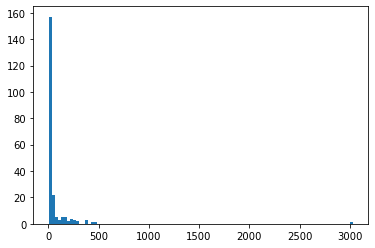

BLDGCL -> 0.0129750544115185 (155 uniques) [1877, 1290, 1162, 1031, 822] [1, 1, 1, 1, 1]


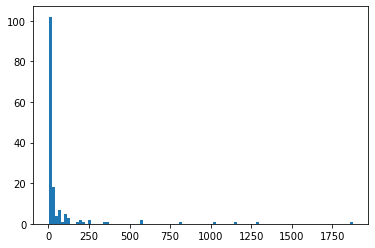

EXCD1 -> 0.005943412020760087 (71 uniques) [3352, 485, 400, 221, 219] [1, 1, 1, 1, 1]


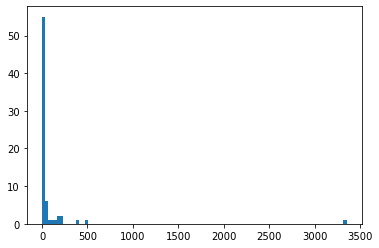

STORIES -> 0.005357441821530219 (64 uniques) [4258, 1453, 1418, 442, 393] [1, 1, 1, 1, 1]


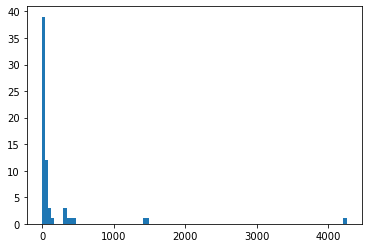

POSTCODE -> 0.004436631508454713 (53 uniques) [3309, 697, 545, 440, 407] [1, 1, 1, 1, 1]


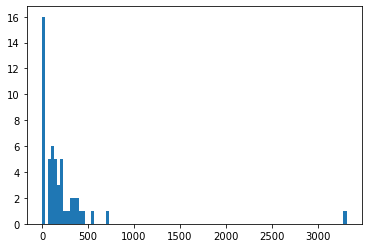

NTA -> 0.0037669512807634357 (45 uniques) [1484, 1463, 979, 851, 708] [2, 1, 1, 1, 1]


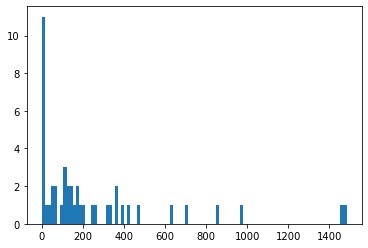

Community Board -> 0.0019253306546124225 (23 uniques) [2947, 1663, 869, 851, 826] [34, 7, 5, 1, 1]


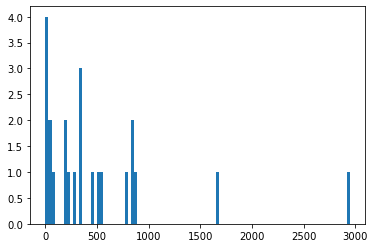

Council District -> 0.0017579105976896032 (21 uniques) [2146, 1765, 1123, 1020, 859] [85, 71, 20, 6, 4]


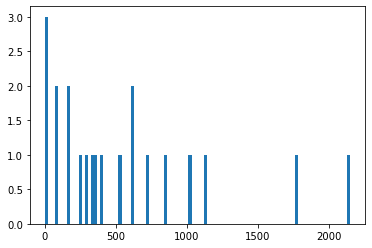

EXCD2 -> 0.0009208103130755065 (11 uniques) [562, 96, 45, 35, 13] [5, 2, 1, 1, 1]


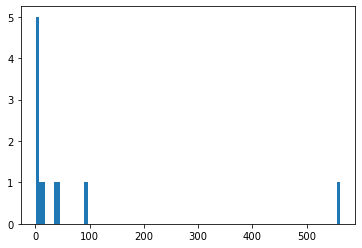

TAXCLASS -> 0.0008371002846140967 (10 uniques) [5963, 2599, 1337, 1162, 259] [216, 198, 133, 73, 6]


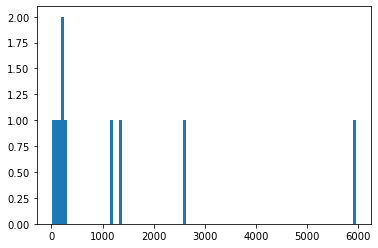

EXMPTCL -> 0.0007533902561526871 (9 uniques) [114, 57, 4, 4, 4] [4, 3, 3, 2, 1]


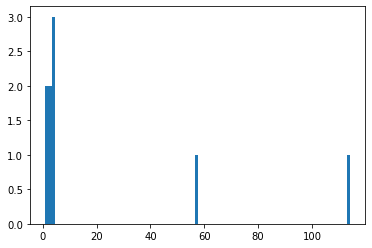

EASEMENT -> 0.0005022601707684581 (6 uniques) [100, 15, 4, 4, 2] [15, 4, 4, 2, 1]


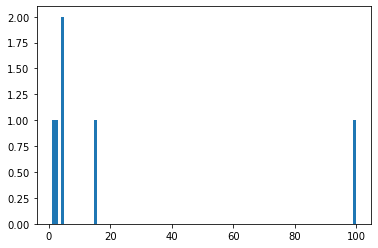

Borough -> 0.00041855014230704837 (5 uniques) [3775, 2065, 2060, 1808, 1806] [3775, 2065, 2060, 1808, 1806]


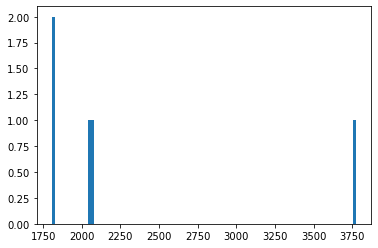

BORO -> 0.00041855014230704837 (5 uniques) [4004, 2111, 2082, 1912, 1837] [4004, 2111, 2082, 1912, 1837]


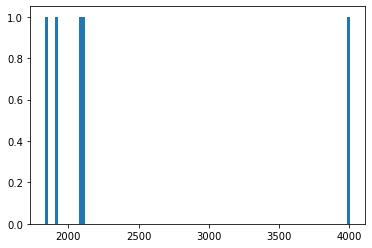

EXT -> 0.00025113008538422905 (3 uniques) [2441, 344, 197] [2441, 344, 197]


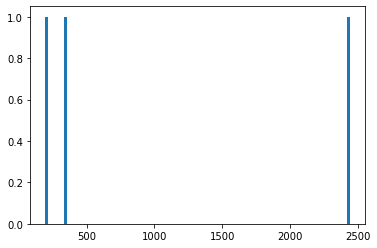

YEAR -> 0.00016742005692281934 (2 uniques) [6086, 5860] [6086, 5860]


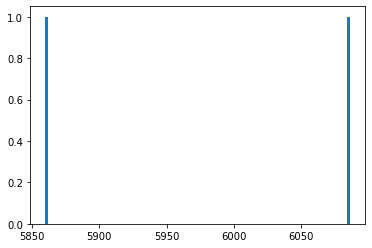

VALTYPE -> 8.371002846140967e-05 (1 uniques) [11946] [11946]


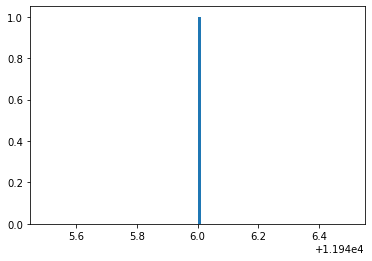

PERIOD -> 8.371002846140967e-05 (1 uniques) [11946] [11946]


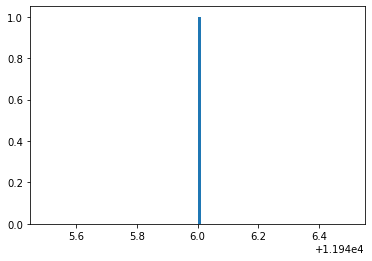

In [15]:
l = [(column, df[column].nunique()) for column in df.columns]
l = reversed(sorted(l, key=lambda x: x[1]))
for x in l:
    cnt = list(reversed(sorted(df.groupby(x[0])['BBLE'].nunique())))
    print(x[0], '->', x[1] / length, f'({x[1]} uniques)', cnt[:5], cnt[-5:])
    plt.hist(cnt, bins=100)
    plt.show()

In [16]:
owner_cnt = df.groupby('OWNER')['BBLE'].nunique()
bin_cnt = df.groupby('BIN')['BBLE'].nunique()
census_cnt = df.groupby('Census Tract')['BBLE'].nunique()
bldgcl_cnt = df.groupby('BLDGCL')['BBLE'].nunique()
excd1_cnt = df.groupby('EXCD1')['BBLE'].nunique()
nta_cnt = df.groupby('NTA')['BBLE'].nunique()
community_board_cnt = df.groupby('Community Board')['BBLE'].nunique()
#excd2_cnt = df.groupby('EXCD2')['BBLE'].nunique()

In [17]:
df['OWNER_RICHNESS'] = 'poor'
df['BIN_POPULARNESS'] = 'not popular'
df.loc[df['OWNER'].isin(owner_cnt[owner_cnt > 10].index), 'OWNER_RICHNESS'] = 'very rich'
df.loc[df['OWNER'].isin(owner_cnt[(owner_cnt > 1) & (owner_cnt <= 10)].index), 'OWNER_RICHNESS'] = 'rich'
df.loc[df['BIN'].isin(bin_cnt[bin_cnt > 10].index), 'BIN_POPULARNESS'] = 'very popular'
df.loc[df['BIN'].isin(bin_cnt[(bin_cnt > 1) & (bin_cnt <= 10)].index), 'BIN_POPULARNESS'] = 'popular'
df.loc[df['Census Tract'].isin(census_cnt[census_cnt <= 10].index), 'Census Tract'] = 'other category'
df.loc[df['Census Tract'] != 'other', 'Census Tract'] = df.loc[df['Census Tract'] != 'other', 'Census Tract'].astype(str) + ' category'
df.loc[df['BLDGCL'].isin(bldgcl_cnt[bldgcl_cnt <= 10].index), 'BLDGCL'] = 'OTHER_BUILDING_CLASS'
df.loc[df['EXCD1'].isin(excd1_cnt[excd1_cnt <= 10].index), 'EXCD1'] = 'other'
df.loc[df['EXCD1'] != 'other', 'EXCD1'] = df.loc[df['EXCD1'] != 'other', 'EXCD1'].astype(str) + 'category'
df.loc[df['NTA'].isin(nta_cnt[nta_cnt <= 10].index), 'NTA'] = 'OTHER_NTA'
df.loc[df['Community Board'].isin(community_board_cnt[community_board_cnt <= 10].index), 'Community Board'] = 'other'
df.loc[df['Community Board'] != 'other', 'Community Board'] = df.loc[df['Community Board'] != 'other', 'Community Board'].astype(str) + ' category'
df.loc[:, 'Council District'] = df.loc[:, 'Council District'].astype(str) + ' category'
#df.loc[df['EXCD2'].isin(excd2_cnt[excd2_cnt <= 10].index), 'EXCD2'] = 'other'
#df.loc[df['EXCD2'] != 'other', 'EXCD2'] = df.loc[df['EXCD2'] != 'other', 'EXCD2'].astype(str) + ' category'
df['TAXCLASS'] = df['TAXCLASS'].astype(str)


df.loc[df['EXTOT'] == 0, 'EXTOT'] = np.nan
df.loc[df['EXLAND'] == 0, 'EXLAND'] = np.nan
df.loc[df['LTDEPTH'] == 0, 'LTDEPTH'] = np.nan
df.loc[df['LTFRONT'] == 0, 'LTFRONT'] = np.nan
df.loc[df['BLDFRONT'] == 0, 'BLDFRONT'] = np.nan
df.loc[df['BLDDEPTH'] == 0, 'BLDDEPTH'] = np.nan

In [18]:
df[['AVLAND', 'AVTOT', 'AVLAND2', 'AVTOT2', 'EXTOT', 'EXTOT2', 'EXLAND', 'EXLAND2']]

AVLAND    AVTOT   AVLAND2     AVTOT2     EXTOT    EXTOT2   EXLAND  \
0      118035  1558350  118035.0  1469160.0       NaN       NaN      NaN   
1       17301   111503   17301.0   100640.0  111503.0  100640.0  17301.0   
2       11304    78002   11304.0    67154.0       NaN       NaN      NaN   
3       14081    83048   14081.0    76467.0   83048.0   76467.0  14081.0   
4       10126   251972   10126.0   208110.0       NaN       NaN      NaN   
...       ...      ...       ...        ...       ...       ...      ...   
11941    5413    21814       NaN        NaN       NaN       NaN      NaN   
11942    1083    11851       NaN        NaN    1470.0       NaN   1083.0   
11943    8443    16663       NaN        NaN    1470.0       NaN   1470.0   
11944    9813    25164       NaN        NaN    1470.0       NaN   1470.0   
11945   12960    33420       NaN        NaN       NaN       NaN      NaN   

       EXLAND2  
0          NaN  
1      17301.0  
2          NaN  
3      14081.0  
4          NaN  
...        ...  
11941      NaN  
11942      NaN  
11943      NaN  
11944      NaN  
11945      NaN  

[11946 rows x 8 columns]

In [19]:
df['Census Tract']

0           33.0 category
1        31704.0 category
2         1502.0 category
3        31704.0 category
4           33.0 category
               ...       
11941    30302.0 category
11942    30302.0 category
11943    30302.0 category
11944    27302.0 category
11945    27302.0 category
Name: Census Tract, Length: 11946, dtype: object

In [20]:
df = df.drop(columns='BBLE') # indices (every unique)
df = df.drop(columns='VALTYPE') # only 1 unique values
df = df.drop(columns='OWNER') # Owner replaced by OWNER_RICHNESS (could also get sth from owner name)
df = df.drop(columns='STADDR') # Address not needed - we already use long. + lat.
df = df.drop(columns='New Georeferenced Column') # Point not needed - we already use long. + lat.
df = df.drop(columns='BIN') # BIN replaced by BIN_POPULARNESS, BIN probably not needed - we already use long. + lat.
#AVLAND and AVTOT - wazne wartosci liczbowe
#FULLVAL - y do przewidzenia
#AVLAND2  and AVTOT2 - wazne wartosci liczbowe
#EXTOT, EXTOT2, EXLAND and EXLAND2 - wazne wartosci liczbowe
df = df.drop(columns='BLOCK') # BLOCK not needed - we already use long. + lat.
df = df.drop(columns='LOT') # LOT number is used for taxes (either do some mapping to taxation or drop it)
# LTDEPTH and LTFRONT - chyba to wielkości posesji
# BLDFRONT, BLDDEPTH - wielkości budynku

# STORIES - liczba pięter
df = df.drop(columns='POSTCODE') # POSTCODE not needed - we already use long. + lat. 
# Community Board - kategoryczna zmienna 
# EXCD2 - exception code 2, kategoryczna zmienna
df = df.drop(columns='EXCD2') # EXCD2 not needed - too many nans.
df = df.drop(columns='EXMPTCL') # EXMPTCL not needed - too many nans.
df = df.drop(columns='EASEMENT') # fajny opis ale tylko 120 non-nan wiec out.
# Borough - dzielnica, kategoryczne
df = df.drop(columns='BORO') # PRAWIE to samo co Borough.
# EXT - Extension indicator, kategoryczne
df = df.drop(columns='PERIOD') # Tylko jedno unique value.

In [21]:
df.to_csv('cleaned.csv', index=0)

# Filling nans

In [22]:
df = pd.read_csv('cleaned.csv')
df.head()

BLDGCL TAXCLASS  LTFRONT  LTDEPTH  EXT  STORIES  FULLVAL  AVLAND    AVTOT  \
0     RK        4      NaN      NaN  NaN      6.0  3463000  118035  1558350   
1     R4        2      NaN      NaN  NaN     23.0   247784   17301   111503   
2     R4        2      NaN      NaN  NaN     25.0   173338   11304    78002   
3     R4        2      NaN      NaN  NaN     27.0   184550   14081    83048   
4     R4        2      NaN      NaN  NaN     19.0   559937   10126   251972   

    EXLAND  ...     YEAR    Borough   Latitude  Longitude  Community Board  \
0      NaN  ...  2018/19  MANHATTAN  40.719232 -74.008095   101.0 category   
1  17301.0  ...  2018/19  MANHATTAN  40.709270 -74.016487   101.0 category   
2      NaN  ...  2018/19  MANHATTAN  40.708006 -74.006164   101.0 category   
3  14081.0  ...  2018/19  MANHATTAN  40.709506 -74.018002   101.0 category   
4      NaN  ...  2018/19  MANHATTAN  40.718024 -74.003903   101.0 category   

   Council District      Census Tract                                     NTA  \
0      1.0 category     33.0 category  SoHo-TriBeCa-Civic Center-Little Italy   
1      1.0 category  31704.0 category       Battery Park City-Lower Manhattan   
2      1.0 category   1502.0 category       Battery Park City-Lower Manhattan   
3      1.0 category  31704.0 category       Battery Park City-Lower Manhattan   
4      1.0 category     33.0 category  SoHo-TriBeCa-Civic Center-Little Italy   

  OWNER_RICHNESS BIN_POPULARNESS  
0           poor     not popular  
1           poor    very popular  
2           poor    very popular  
3           poor    very popular  
4           poor         popular  

[5 rows x 28 columns]

In [23]:
val2_cols = [col for col in df.columns if df[col].nunique() <= 2]
val2_cols

['YEAR']

In [24]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in df.columns:
    mask = pd.isna(df[column])
    s = mask.sum()
    if s > 0:
        if column in numerical_columns:
            m = df[column].mean()
            if s > 10:
                df[str(column) + '_WAS_NAN'] = 0
                df.loc[mask, str(column) + '_WAS_NAN'] = 1
        else:
            m = 'nan_val'
        df[column] = df[column].fillna(m)

In [25]:
df.to_csv('cleaned.csv', index=0)

# Feature engineering

In [26]:
df = pd.read_csv('cleaned.csv')

In [27]:
df['LTAREA'] = df['LTDEPTH'] * df['LTFRONT']
df['BLDAREA'] = df['BLDDEPTH'] * df['BLDFRONT']

In [28]:
df.to_csv('cleaned.csv', index=0)

# Augment

In [29]:
augmented_df = pd.read_csv('cleaned.csv')
augmented_df.loc[(augmented_df['Latitude'] <= 90) & (augmented_df['Latitude'] >= -90)]

BLDGCL TAXCLASS    LTFRONT     LTDEPTH      EXT  STORIES  FULLVAL  \
0         RK        4  45.837097  106.553583  nan_val      6.0  3463000   
1         R4        2  45.837097  106.553583  nan_val     23.0   247784   
2         R4        2  45.837097  106.553583  nan_val     25.0   173338   
3         R4        2  45.837097  106.553583  nan_val     27.0   184550   
4         R4        2  45.837097  106.553583  nan_val     19.0   559937   
...      ...      ...        ...         ...      ...      ...      ...   
11941     A5        1  25.000000  100.000000  nan_val      2.0   407000   
11942     R3       1A  45.837097  106.553583  nan_val      1.0   244285   
11943     A2        1  45.000000  100.000000  nan_val      1.0   298000   
11944     A5        1  62.000000   50.000000  nan_val      2.0   459000   
11945     B2        1  47.000000  100.000000        G      2.0   557000   

       AVLAND    AVTOT        EXLAND  ...  BLDFRONT_WAS_NAN BLDDEPTH_WAS_NAN  \
0      118035  1558350  98540.410129  ...                 1                1   
1       17301   111503  17301.000000  ...                 1                1   
2       11304    78002  98540.410129  ...                 0                0   
3       14081    83048  14081.000000  ...                 1                1   
4       10126   251972  98540.410129  ...                 0                0   
...       ...      ...           ...  ...               ...              ...   
11941    5413    21814  98540.410129  ...                 0                0   
11942    1083    11851   1083.000000  ...                 0                0   
11943    8443    16663   1470.000000  ...                 0                0   
11944    9813    25164   1470.000000  ...                 0                0   
11945   12960    33420  98540.410129  ...                 0                0   

       AVLAND2_WAS_NAN  AVTOT2_WAS_NAN  EXLAND2_WAS_NAN  EXTOT2_WAS_NAN  \
0                    0               0                1               1   
1                    0               0                0               0   
2                    0               0                1               1   
3                    0               0                0               0   
4                    0               0                1               1   
...                ...             ...              ...             ...   
11941                1               1                1               1   
11942                1               1                1               1   
11943                1               1                1               1   
11944                1               1                1               1   
11945                1               1                1               1   

       Latitude_WAS_NAN  Longitude_WAS_NAN       LTAREA       BLDAREA  
0                     0                  0  4884.106921   2232.133087  
1                     0                  0  4884.106921   2232.133087  
2                     0                  0  4884.106921  22016.000000  
3                     0                  0  4884.106921   2232.133087  
4                     0                  0  4884.106921   6500.000000  
...                 ...                ...          ...           ...  
11941                 0                  0  2500.000000    840.000000  
11942                 0                  0  4884.106921    940.000000  
11943                 0                  0  4500.000000   1000.000000  
11944                 0                  0  3100.000000    775.000000  
11945                 0                  0  4700.000000   1274.000000  

[11946 rows x 43 columns]

In [30]:
augmented_df.loc[(augmented_df['Longitude'] <= 180) & (augmented_df['Longitude'] >= -180)]

BLDGCL TAXCLASS    LTFRONT     LTDEPTH      EXT  STORIES  FULLVAL  \
0         RK        4  45.837097  106.553583  nan_val      6.0  3463000   
1         R4        2  45.837097  106.553583  nan_val     23.0   247784   
2         R4        2  45.837097  106.553583  nan_val     25.0   173338   
3         R4        2  45.837097  106.553583  nan_val     27.0   184550   
4         R4        2  45.837097  106.553583  nan_val     19.0   559937   
...      ...      ...        ...         ...      ...      ...      ...   
11941     A5        1  25.000000  100.000000  nan_val      2.0   407000   
11942     R3       1A  45.837097  106.553583  nan_val      1.0   244285   
11943     A2        1  45.000000  100.000000  nan_val      1.0   298000   
11944     A5        1  62.000000   50.000000  nan_val      2.0   459000   
11945     B2        1  47.000000  100.000000        G      2.0   557000   

       AVLAND    AVTOT        EXLAND  ...  BLDFRONT_WAS_NAN BLDDEPTH_WAS_NAN  \
0      118035  1558350  98540.410129  ...                 1                1   
1       17301   111503  17301.000000  ...                 1                1   
2       11304    78002  98540.410129  ...                 0                0   
3       14081    83048  14081.000000  ...                 1                1   
4       10126   251972  98540.410129  ...                 0                0   
...       ...      ...           ...  ...               ...              ...   
11941    5413    21814  98540.410129  ...                 0                0   
11942    1083    11851   1083.000000  ...                 0                0   
11943    8443    16663   1470.000000  ...                 0                0   
11944    9813    25164   1470.000000  ...                 0                0   
11945   12960    33420  98540.410129  ...                 0                0   

       AVLAND2_WAS_NAN  AVTOT2_WAS_NAN  EXLAND2_WAS_NAN  EXTOT2_WAS_NAN  \
0                    0               0                1               1   
1                    0               0                0               0   
2                    0               0                1               1   
3                    0               0                0               0   
4                    0               0                1               1   
...                ...             ...              ...             ...   
11941                1               1                1               1   
11942                1               1                1               1   
11943                1               1                1               1   
11944                1               1                1               1   
11945                1               1                1               1   

       Latitude_WAS_NAN  Longitude_WAS_NAN       LTAREA       BLDAREA  
0                     0                  0  4884.106921   2232.133087  
1                     0                  0  4884.106921   2232.133087  
2                     0                  0  4884.106921  22016.000000  
3                     0                  0  4884.106921   2232.133087  
4                     0                  0  4884.106921   6500.000000  
...                 ...                ...          ...           ...  
11941                 0                  0  2500.000000    840.000000  
11942                 0                  0  4884.106921    940.000000  
11943                 0                  0  4500.000000   1000.000000  
11944                 0                  0  3100.000000    775.000000  
11945                 0                  0  4700.000000   1274.000000  

[11946 rows x 43 columns]

In [31]:
value_cols = ['1-closest neighbour value', 
              '2-closest neighbour value', 
              '3-closest neighbour value', 
              '4-closest neighbour value', 
              '5-closest neighbour value']

distance_cols = ['1-closest neighbour distance', 
              '2-closest neighbour distance', 
              '3-closest neighbour distance', 
              '4-closest neighbour distance', 
              '5-closest neighbour distance']

value_per_bld_area_cols = [f'{i+1}-closest neighbour value per building area' for i in range(5)]
value_per_lt_area_cols = [f'{i+1}-closest neighbour value per lot area' for i in range(5)]
new_cols = value_cols + distance_cols + value_per_bld_area_cols + value_per_lt_area_cols

In [32]:
augmented_df[new_cols] = 0

augmented_df[new_cols].head()

1-closest neighbour value  2-closest neighbour value  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   3-closest neighbour value  4-closest neighbour value  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   5-closest neighbour value  1-closest neighbour distance  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   2-closest neighbour distance  3-closest neighbour distance  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   4-closest neighbour distance  5-closest neighbour distance  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   1-closest neighbour value per building area  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   2-closest neighbour value per building area  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   3-closest neighbour value per building area  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   4-closest neighbour value per building area  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   5-closest neighbour value per building area  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   1-closest neighbour value per lot area  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   2-closest neighbour value per lot area  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   3-closest neighbour value per lot area  \
0                                       0   
1

In [33]:
from sklearn.neighbors import BallTree

In [34]:
print(augmented_df[['Latitude', 'Longitude']].values.shape)

(11946, 2)


In [35]:
augmented_df[['Latitude', 'Longitude']].describe()

Latitude     Longitude
count  11946.000000  11946.000000
mean      40.693080    -73.996417
std        0.083563      0.136901
min       40.572265    -74.201789
25%       40.616051    -74.150957
50%       40.692357    -74.001924
75%       40.735743    -73.909872
max       40.912536    -73.700779

In [36]:
len(augmented_df)

11946

In [37]:
tree = BallTree(np.deg2rad(augmented_df[['Latitude', 'Longitude']].values), metric='haversine')

In [38]:
query_lats = augmented_df['Latitude']
query_lons = augmented_df['Longitude']
print(query_lats.shape)
print(query_lons.shape)
print(query_lats.head())
print(query_lons.head())

(11946,)
(11946,)
0    40.719232
1    40.709270
2    40.708006
3    40.709506
4    40.718024
Name: Latitude, dtype: float64
0   -74.008095
1   -74.016487
2   -74.006164
3   -74.018002
4   -74.003903
Name: Longitude, dtype: float64


In [39]:
# Find closest city in reference dataset for each in df_other
# use k = 6 for 5 closest neighbors + self
distances, indices = tree.query(np.deg2rad(np.c_[query_lats, query_lons]), k = 6)
# print(len(distances))
# print(len(indices))

r_km = 6371 # multiplier to convert to km (from unit distance)
for name, d, ind in zip(augmented_df.index, distances, indices):
    print(f"Property with index {name} closest matches:")
    for i, index in enumerate(ind):
        print(f"\t{index} with distance {d[i]*r_km:.4f} km")

Property with index 0 closest matches:
	0 with distance 0.0000 km
	421 with distance 0.0049 km
	1707 with distance 0.0174 km
	1346 with distance 0.0509 km
	913 with distance 0.0509 km
	984 with distance 0.0548 km
Property with index 1 closest matches:
	1340 with distance 0.0000 km
	490 with distance 0.0000 km
	200 with distance 0.0000 km
	651 with distance 0.0000 km
	778 with distance 0.0000 km
	1470 with distance 0.0000 km
Property with index 2 closest matches:
	678 with distance 0.0000 km
	1309 with distance 0.0000 km
	473 with distance 0.0000 km
	1627 with distance 0.0000 km
	452 with distance 0.0000 km
	449 with distance 0.0000 km
Property with index 3 closest matches:
	993 with distance 0.0000 km
	996 with distance 0.0000 km
	310 with distance 0.0000 km
	458 with distance 0.0000 km
	470 with distance 0.0000 km
	3 with distance 0.0000 km
Property with index 4 closest matches:
	90 with distance 0.0000 km
	4 with distance 0.0000 km
	1696 with distance 0.0000 km
	343 with distance 0.0

	296 with distance 0.0000 km
	1538 with distance 0.0000 km
	611 with distance 0.0000 km
Property with index 289 closest matches:
	289 with distance 0.0000 km
	1666 with distance 0.0000 km
	1427 with distance 0.0470 km
	1055 with distance 0.0470 km
	1712 with distance 0.0470 km
	667 with distance 0.0470 km
Property with index 290 closest matches:
	1549 with distance 0.0000 km
	129 with distance 0.0000 km
	1535 with distance 0.0000 km
	1437 with distance 0.0000 km
	1182 with distance 0.0000 km
	1573 with distance 0.0000 km
Property with index 291 closest matches:
	291 with distance 0.0000 km
	831 with distance 0.0340 km
	1637 with distance 0.0340 km
	1060 with distance 0.0340 km
	1384 with distance 0.0445 km
	148 with distance 0.0525 km
Property with index 292 closest matches:
	754 with distance 0.0000 km
	1724 with distance 0.0000 km
	1636 with distance 0.0000 km
	1768 with distance 0.0000 km
	1401 with distance 0.0000 km
	801 with distance 0.0000 km
Property with index 293 closest matc

	1625 with distance 0.0000 km
	1178 with distance 0.0000 km
	453 with distance 0.0000 km
	1202 with distance 0.0154 km
	153 with distance 0.0232 km
	1085 with distance 0.0535 km
Property with index 454 closest matches:
	539 with distance 0.0000 km
	551 with distance 0.0000 km
	339 with distance 0.0000 km
	1577 with distance 0.0000 km
	1457 with distance 0.0000 km
	1520 with distance 0.0000 km
Property with index 455 closest matches:
	1240 with distance 0.0000 km
	455 with distance 0.0000 km
	416 with distance 0.0000 km
	237 with distance 0.0000 km
	1630 with distance 0.0000 km
	1566 with distance 0.0000 km
Property with index 456 closest matches:
	456 with distance 0.0000 km
	1594 with distance 0.0071 km
	543 with distance 0.0071 km
	1513 with distance 0.0105 km
	1494 with distance 0.0105 km
	459 with distance 0.0140 km
Property with index 457 closest matches:
	463 with distance 0.0000 km
	811 with distance 0.0000 km
	204 with distance 0.0000 km
	1238 with distance 0.0000 km
	854 with 

	976 with distance 0.0000 km
	991 with distance 0.0000 km
Property with index 700 closest matches:
	700 with distance 0.0000 km
	1176 with distance 0.0069 km
	1494 with distance 0.0176 km
	1513 with distance 0.0176 km
	543 with distance 0.0208 km
	1594 with distance 0.0208 km
Property with index 701 closest matches:
	701 with distance 0.0000 km
	1586 with distance 0.0307 km
	558 with distance 0.0307 km
	1056 with distance 0.0332 km
	365 with distance 0.0399 km
	847 with distance 0.0570 km
Property with index 702 closest matches:
	116 with distance 0.0000 km
	1173 with distance 0.0000 km
	575 with distance 0.0000 km
	572 with distance 0.0000 km
	976 with distance 0.0000 km
	991 with distance 0.0000 km
Property with index 703 closest matches:
	703 with distance 0.0000 km
	1152 with distance 0.0669 km
	1571 with distance 0.0669 km
	560 with distance 0.0669 km
	512 with distance 0.0669 km
	1633 with distance 0.0838 km
Property with index 704 closest matches:
	704 with distance 0.0000 km
	3

	464 with distance 0.0000 km
	1074 with distance 0.0000 km
	439 with distance 0.0000 km
	517 with distance 0.0000 km
Property with index 917 closest matches:
	969 with distance 0.0000 km
	715 with distance 0.0000 km
	1715 with distance 0.0000 km
	1145 with distance 0.0000 km
	902 with distance 0.0000 km
	1727 with distance 0.0000 km
Property with index 918 closest matches:
	918 with distance 0.0000 km
	1214 with distance 0.0000 km
	761 with distance 0.0000 km
	992 with distance 0.0000 km
	749 with distance 0.0000 km
	748 with distance 0.0000 km
Property with index 919 closest matches:
	1760 with distance 0.0000 km
	919 with distance 0.0000 km
	510 with distance 0.0075 km
	659 with distance 0.0340 km
	978 with distance 0.0340 km
	1073 with distance 0.0424 km
Property with index 920 closest matches:
	994 with distance 0.0000 km
	920 with distance 0.0000 km
	492 with distance 0.0033 km
	670 with distance 0.0203 km
	593 with distance 0.0203 km
	745 with distance 0.0203 km
Property with ind

	1788 with distance 0.0000 km
	1233 with distance 0.0000 km
	1184 with distance 0.0000 km
	1688 with distance 0.0000 km
	1163 with distance 0.0000 km
	261 with distance 0.0000 km
Property with index 1156 closest matches:
	737 with distance 0.0000 km
	852 with distance 0.0000 km
	109 with distance 0.0000 km
	1601 with distance 0.0000 km
	111 with distance 0.0000 km
	1798 with distance 0.0000 km
Property with index 1157 closest matches:
	838 with distance 0.0000 km
	1655 with distance 0.0000 km
	806 with distance 0.0000 km
	276 with distance 0.0000 km
	1022 with distance 0.0000 km
	1624 with distance 0.0000 km
Property with index 1158 closest matches:
	678 with distance 0.0000 km
	1309 with distance 0.0000 km
	473 with distance 0.0000 km
	1627 with distance 0.0000 km
	452 with distance 0.0000 km
	449 with distance 0.0000 km
Property with index 1159 closest matches:
	1505 with distance 0.0000 km
	117 with distance 0.0000 km
	460 with distance 0.0000 km
	646 with distance 0.0000 km
	1466 w

Property with index 1387 closest matches:
	1387 with distance 0.0000 km
	136 with distance 0.0018 km
	1697 with distance 0.0018 km
	9 with distance 0.0073 km
	1273 with distance 0.0294 km
	814 with distance 0.0294 km
Property with index 1388 closest matches:
	1532 with distance 0.0000 km
	441 with distance 0.0000 km
	581 with distance 0.0000 km
	1388 with distance 0.0000 km
	1358 with distance 0.0000 km
	805 with distance 0.0000 km
Property with index 1389 closest matches:
	1767 with distance 0.0000 km
	982 with distance 0.0000 km
	1253 with distance 0.0000 km
	26 with distance 0.0000 km
	346 with distance 0.0000 km
	1499 with distance 0.0000 km
Property with index 1390 closest matches:
	1390 with distance 0.0000 km
	631 with distance 0.0234 km
	1115 with distance 0.2607 km
	603 with distance 0.2607 km
	251 with distance 0.2607 km
	824 with distance 0.2733 km
Property with index 1391 closest matches:
	673 with distance 0.0000 km
	1391 with distance 0.0000 km
	435 with distance 0.0000 k

	813 with distance 0.0000 km
	1044 with distance 0.0000 km
	1455 with distance 0.0000 km
	1619 with distance 0.0000 km
	394 with distance 0.0599 km
	1695 with distance 0.1021 km
Property with index 1620 closest matches:
	1620 with distance 0.0000 km
	472 with distance 0.0000 km
	269 with distance 0.0000 km
	714 with distance 0.0000 km
	867 with distance 0.0000 km
	622 with distance 0.0000 km
Property with index 1621 closest matches:
	1621 with distance 0.0000 km
	1650 with distance 0.0000 km
	464 with distance 0.0000 km
	1074 with distance 0.0000 km
	439 with distance 0.0000 km
	517 with distance 0.0000 km
Property with index 1622 closest matches:
	846 with distance 0.0000 km
	1140 with distance 0.0000 km
	1075 with distance 0.0000 km
	648 with distance 0.0000 km
	121 with distance 0.0000 km
	82 with distance 0.0000 km
Property with index 1623 closest matches:
	451 with distance 0.0000 km
	1429 with distance 0.0000 km
	621 with distance 0.0000 km
	246 with distance 0.0000 km
	195 with 

	2095 with distance 0.0875 km
	2241 with distance 0.0990 km
Property with index 1842 closest matches:
	1842 with distance 0.0000 km
	2821 with distance 0.0080 km
	1980 with distance 0.0334 km
	3202 with distance 0.0913 km
	1943 with distance 0.0990 km
	3652 with distance 0.1460 km
Property with index 1843 closest matches:
	1843 with distance 0.0000 km
	3142 with distance 0.0151 km
	2022 with distance 0.0789 km
	2922 with distance 0.0940 km
	3164 with distance 0.1601 km
	2511 with distance 0.1622 km
Property with index 1844 closest matches:
	1844 with distance 0.0000 km
	2706 with distance 0.0116 km
	3647 with distance 0.0116 km
	3763 with distance 0.0189 km
	3560 with distance 0.0189 km
	2406 with distance 0.0234 km
Property with index 1845 closest matches:
	1845 with distance 0.0000 km
	2561 with distance 0.0248 km
	3814 with distance 0.0796 km
	2895 with distance 0.0806 km
	2464 with distance 0.0823 km
	2147 with distance 0.0833 km
Property with index 1846 closest matches:
	1846 with

	2064 with distance 0.0000 km
	2073 with distance 0.0077 km
	2991 with distance 0.0293 km
	2278 with distance 0.0701 km
	2823 with distance 0.0933 km
	2053 with distance 0.1009 km
Property with index 2065 closest matches:
	2065 with distance 0.0000 km
	1914 with distance 0.0782 km
	3658 with distance 0.0925 km
	3448 with distance 0.0977 km
	1904 with distance 0.1111 km
	3201 with distance 0.1186 km
Property with index 2066 closest matches:
	2066 with distance 0.0000 km
	2880 with distance 0.0204 km
	3050 with distance 0.0403 km
	2174 with distance 0.0979 km
	2840 with distance 0.1269 km
	3468 with distance 0.1551 km
Property with index 2067 closest matches:
	2067 with distance 0.0000 km
	3688 with distance 0.0742 km
	2429 with distance 0.1459 km
	2515 with distance 0.1685 km
	2390 with distance 0.1833 km
	3796 with distance 0.1843 km
Property with index 2068 closest matches:
	2068 with distance 0.0000 km
	2864 with distance 0.0725 km
	3782 with distance 0.0738 km
	2626 with distance 0.

	2227 with distance 0.1062 km
	3708 with distance 0.1200 km
	2365 with distance 0.1223 km
Property with index 2297 closest matches:
	2297 with distance 0.0000 km
	2877 with distance 0.0447 km
	2302 with distance 0.0511 km
	3180 with distance 0.0560 km
	1840 with distance 0.1132 km
	2389 with distance 0.1211 km
Property with index 2298 closest matches:
	2298 with distance 0.0000 km
	3696 with distance 0.0587 km
	3534 with distance 0.0868 km
	2613 with distance 0.0944 km
	3518 with distance 0.1057 km
	3246 with distance 0.1195 km
Property with index 2299 closest matches:
	2299 with distance 0.0000 km
	3065 with distance 0.0275 km
	3812 with distance 0.0402 km
	3087 with distance 0.0551 km
	3788 with distance 0.0797 km
	2917 with distance 0.0814 km
Property with index 2300 closest matches:
	2300 with distance 0.0000 km
	2708 with distance 0.0157 km
	3308 with distance 0.0384 km
	3030 with distance 0.0502 km
	2696 with distance 0.0586 km
	2228 with distance 0.0736 km
Property with index 23

	3795 with distance 0.0815 km
	2872 with distance 0.0838 km
	3642 with distance 0.0886 km
	3807 with distance 0.1657 km
Property with index 2573 closest matches:
	2573 with distance 0.0000 km
	2263 with distance 0.0496 km
	2112 with distance 0.0772 km
	3517 with distance 0.0894 km
	3626 with distance 0.0900 km
	3479 with distance 0.0912 km
Property with index 2574 closest matches:
	2574 with distance 0.0000 km
	2855 with distance 0.0279 km
	3644 with distance 0.0831 km
	3553 with distance 0.0933 km
	3495 with distance 0.1000 km
	3584 with distance 0.1124 km
Property with index 2575 closest matches:
	2575 with distance 0.0000 km
	2648 with distance 0.0752 km
	3131 with distance 0.0790 km
	3767 with distance 0.0794 km
	2929 with distance 0.0888 km
	2259 with distance 0.0933 km
Property with index 2576 closest matches:
	2576 with distance 0.0000 km
	2352 with distance 0.0132 km
	2375 with distance 0.1074 km
	3133 with distance 0.1074 km
	3357 with distance 0.1074 km
	3121 with distance 0.

	2828 with distance 0.0000 km
	3245 with distance 0.0087 km
	2213 with distance 0.0258 km
	1955 with distance 0.0327 km
	2207 with distance 0.0432 km
	2522 with distance 0.0551 km
Property with index 2829 closest matches:
	2829 with distance 0.0000 km
	2303 with distance 0.0020 km
	3013 with distance 0.0059 km
	3789 with distance 0.0115 km
	1893 with distance 0.0115 km
	2904 with distance 0.0173 km
Property with index 2830 closest matches:
	2830 with distance 0.0000 km
	2878 with distance 0.0603 km
	2030 with distance 0.0749 km
	2692 with distance 0.1048 km
	3825 with distance 0.1053 km
	3170 with distance 0.1073 km
Property with index 2831 closest matches:
	2246 with distance 0.0000 km
	2831 with distance 0.0000 km
	3190 with distance 0.0000 km
	3560 with distance 0.0072 km
	3763 with distance 0.0072 km
	2927 with distance 0.0073 km
Property with index 2832 closest matches:
	3824 with distance 0.0000 km
	2832 with distance 0.0000 km
	1920 with distance 0.0000 km
	3246 with distance 0.

Property with index 3071 closest matches:
	3071 with distance 0.0000 km
	3509 with distance 0.0580 km
	2095 with distance 0.0834 km
	2503 with distance 0.0838 km
	2080 with distance 0.0891 km
	1959 with distance 0.0914 km
Property with index 3072 closest matches:
	3072 with distance 0.0000 km
	3188 with distance 0.0100 km
	1862 with distance 0.0114 km
	2743 with distance 0.0128 km
	3759 with distance 0.0342 km
	3817 with distance 0.0647 km
Property with index 3073 closest matches:
	2268 with distance 0.0000 km
	3416 with distance 0.0000 km
	2729 with distance 0.0000 km
	3073 with distance 0.0000 km
	3622 with distance 0.0000 km
	2166 with distance 0.0000 km
Property with index 3074 closest matches:
	3074 with distance 0.0000 km
	2305 with distance 0.0543 km
	2488 with distance 0.1235 km
	2950 with distance 0.1427 km
	3402 with distance 0.1443 km
	2086 with distance 0.1456 km
Property with index 3075 closest matches:
	3075 with distance 0.0000 km
	2607 with distance 0.0338 km
	3650 with

	2707 with distance 0.1483 km
Property with index 3289 closest matches:
	3289 with distance 0.0000 km
	2672 with distance 0.0137 km
	3706 with distance 0.0159 km
	2688 with distance 0.0560 km
	2219 with distance 0.1261 km
	3361 with distance 0.1317 km
Property with index 3290 closest matches:
	3290 with distance 0.0000 km
	2871 with distance 0.0599 km
	2875 with distance 0.0604 km
	3837 with distance 0.0738 km
	2438 with distance 0.0781 km
	2849 with distance 0.0853 km
Property with index 3291 closest matches:
	3291 with distance 0.0000 km
	3608 with distance 0.0418 km
	2937 with distance 0.0485 km
	3541 with distance 0.0541 km
	2499 with distance 0.0673 km
	2353 with distance 0.0704 km
Property with index 3292 closest matches:
	4008 with distance 0.0000 km
	9030 with distance 0.0000 km
	9016 with distance 0.0000 km
	10577 with distance 0.0000 km
	10572 with distance 0.0000 km
	10573 with distance 0.0000 km
Property with index 3293 closest matches:
	3293 with distance 0.0000 km
	3095 w

	3136 with distance 0.1659 km
	3006 with distance 0.1869 km
	2035 with distance 0.1886 km
	3470 with distance 0.1907 km
Property with index 3546 closest matches:
	3546 with distance 0.0000 km
	3604 with distance 0.0057 km
	2614 with distance 0.0111 km
	3369 with distance 0.0674 km
	3367 with distance 0.0871 km
	2204 with distance 0.0889 km
Property with index 3547 closest matches:
	3547 with distance 0.0000 km
	3025 with distance 0.0913 km
	2316 with distance 0.1011 km
	3247 with distance 0.1294 km
	3055 with distance 0.1374 km
	2850 with distance 0.1391 km
Property with index 3548 closest matches:
	3548 with distance 0.0000 km
	2697 with distance 0.0026 km
	2114 with distance 0.0385 km
	1916 with distance 0.0882 km
	3808 with distance 0.0885 km
	3067 with distance 0.1156 km
Property with index 3549 closest matches:
	3549 with distance 0.0000 km
	1996 with distance 0.0389 km
	2807 with distance 0.0825 km
	3721 with distance 0.0842 km
	2959 with distance 0.0911 km
	2848 with distance 0.

	2174 with distance 0.1304 km
	2972 with distance 0.1543 km
	2088 with distance 0.1548 km
	2066 with distance 0.1720 km
Property with index 3823 closest matches:
	3823 with distance 0.0000 km
	3325 with distance 0.0719 km
	2043 with distance 0.0831 km
	2703 with distance 0.1603 km
	2954 with distance 0.1652 km
	2430 with distance 0.1670 km
Property with index 3824 closest matches:
	3824 with distance 0.0000 km
	2832 with distance 0.0000 km
	1920 with distance 0.0000 km
	3246 with distance 0.0000 km
	1913 with distance 0.0000 km
	3184 with distance 0.0000 km
Property with index 3825 closest matches:
	3825 with distance 0.0000 km
	3150 with distance 0.0596 km
	2878 with distance 0.0655 km
	3574 with distance 0.0839 km
	3600 with distance 0.0862 km
	3685 with distance 0.0905 km
Property with index 3826 closest matches:
	3826 with distance 0.0000 km
	2145 with distance 0.0813 km
	2472 with distance 0.0959 km
	2838 with distance 0.1004 km
	3305 with distance 0.1061 km
	1852 with distance 0.

Property with index 4110 closest matches:
	4110 with distance 0.0000 km
	4475 with distance 0.0000 km
	3844 with distance 0.0000 km
	4208 with distance 0.0000 km
	4040 with distance 0.0000 km
	4626 with distance 0.0000 km
Property with index 4111 closest matches:
	4111 with distance 0.0000 km
	3906 with distance 0.1614 km
	4506 with distance 0.1687 km
	4417 with distance 0.2383 km
	4109 with distance 0.2448 km
	4614 with distance 0.2795 km
Property with index 4112 closest matches:
	4112 with distance 0.0000 km
	3957 with distance 0.0221 km
	3939 with distance 0.0622 km
	4611 with distance 0.0707 km
	3988 with distance 0.0711 km
	4403 with distance 0.0758 km
Property with index 4113 closest matches:
	4113 with distance 0.0000 km
	4458 with distance 0.0136 km
	4070 with distance 0.0331 km
	4271 with distance 0.0672 km
	4514 with distance 0.0776 km
	4572 with distance 0.0776 km
Property with index 4114 closest matches:
	4114 with distance 0.0000 km
	4026 with distance 0.0000 km
	4358 with

	4063 with distance 0.0789 km
	4449 with distance 0.0789 km
	4197 with distance 0.0825 km
	4540 with distance 0.0825 km
	4132 with distance 0.0858 km
Property with index 4373 closest matches:
	4061 with distance 0.0000 km
	3889 with distance 0.0000 km
	4373 with distance 0.0000 km
	4578 with distance 0.0000 km
	4510 with distance 0.0000 km
	4498 with distance 0.0852 km
Property with index 4374 closest matches:
	4374 with distance 0.0000 km
	4323 with distance 0.0588 km
	3967 with distance 0.0714 km
	4620 with distance 0.0753 km
	4369 with distance 0.0782 km
	4501 with distance 0.0971 km
Property with index 4375 closest matches:
	3918 with distance 0.0000 km
	4310 with distance 0.0000 km
	4375 with distance 0.0000 km
	3870 with distance 0.0296 km
	4192 with distance 0.0625 km
	4087 with distance 0.0625 km
Property with index 4376 closest matches:
	4584 with distance 0.0000 km
	3915 with distance 0.0000 km
	4579 with distance 0.0000 km
	4637 with distance 0.0000 km
	4203 with distance 0.

	4203 with distance 0.0000 km
	4331 with distance 0.0000 km
Property with index 4638 closest matches:
	4638 with distance 0.0000 km
	3982 with distance 0.0581 km
	4484 with distance 0.0778 km
	4305 with distance 0.0903 km
	4156 with distance 0.0934 km
	4073 with distance 0.0949 km
Property with index 4639 closest matches:
	4639 with distance 0.0000 km
	4165 with distance 0.0739 km
	4340 with distance 0.0773 km
	3966 with distance 0.0779 km
	4012 with distance 0.1123 km
	4146 with distance 0.1561 km
Property with index 4640 closest matches:
	4640 with distance 0.0000 km
	3984 with distance 0.0000 km
	4077 with distance 0.1506 km
	3846 with distance 0.1621 km
	4633 with distance 0.1621 km
	3879 with distance 0.1621 km
Property with index 4641 closest matches:
	4641 with distance 0.0000 km
	4651 with distance 0.0462 km
	4014 with distance 0.0462 km
	3917 with distance 0.0829 km
	3847 with distance 0.0897 km
	4456 with distance 0.0979 km
Property with index 4642 closest matches:
	4292 with

	4911 with distance 0.0000 km
	4830 with distance 0.0503 km
	4719 with distance 0.0505 km
	5805 with distance 0.0505 km
	5032 with distance 0.0505 km
	5402 with distance 0.0505 km
Property with index 4912 closest matches:
	4912 with distance 0.0000 km
	4734 with distance 0.0000 km
	5211 with distance 0.0000 km
	5579 with distance 0.0082 km
	5552 with distance 0.0793 km
	4684 with distance 0.0895 km
Property with index 4913 closest matches:
	4913 with distance 0.0000 km
	5287 with distance 0.0846 km
	5216 with distance 0.0970 km
	5802 with distance 0.1011 km
	4828 with distance 0.1095 km
	5355 with distance 0.1313 km
Property with index 4914 closest matches:
	4914 with distance 0.0000 km
	5215 with distance 0.0000 km
	5676 with distance 0.0105 km
	5071 with distance 0.0791 km
	4143 with distance 0.0811 km
	3855 with distance 0.0811 km
Property with index 4915 closest matches:
	4915 with distance 0.0000 km
	4806 with distance 0.0603 km
	5155 with distance 0.0886 km
	5468 with distance 0.

	4909 with distance 0.0286 km
	5551 with distance 0.0458 km
Property with index 5157 closest matches:
	5157 with distance 0.0000 km
	5763 with distance 0.0691 km
	5159 with distance 0.0704 km
	4713 with distance 0.0736 km
	5362 with distance 0.0836 km
	5005 with distance 0.0874 km
Property with index 5158 closest matches:
	4817 with distance 0.0000 km
	5158 with distance 0.0000 km
	5587 with distance 0.0048 km
	5475 with distance 0.0163 km
	5701 with distance 0.0163 km
	5829 with distance 0.0163 km
Property with index 5159 closest matches:
	5159 with distance 0.0000 km
	5763 with distance 0.0022 km
	4713 with distance 0.0037 km
	5157 with distance 0.0704 km
	5649 with distance 0.0955 km
	5849 with distance 0.1105 km
Property with index 5160 closest matches:
	5160 with distance 0.0000 km
	5542 with distance 0.0018 km
	5134 with distance 0.0648 km
	5066 with distance 0.0785 km
	5617 with distance 0.0802 km
	5309 with distance 0.0830 km
Property with index 5161 closest matches:
	5161 with

	5013 with distance 0.0712 km
	5775 with distance 0.0763 km
	5110 with distance 0.0826 km
Property with index 5414 closest matches:
	5414 with distance 0.0000 km
	5118 with distance 0.0055 km
	5162 with distance 0.0402 km
	5739 with distance 0.0577 km
	5629 with distance 0.0804 km
	5263 with distance 0.0878 km
Property with index 5415 closest matches:
	5415 with distance 0.0000 km
	4722 with distance 0.0072 km
	5688 with distance 0.0614 km
	5720 with distance 0.0655 km
	5700 with distance 0.0704 km
	5095 with distance 0.0855 km
Property with index 5416 closest matches:
	5416 with distance 0.0000 km
	5376 with distance 0.0000 km
	5574 with distance 0.0000 km
	5156 with distance 0.0171 km
	5551 with distance 0.0287 km
	5653 with distance 0.0363 km
Property with index 5417 closest matches:
	5417 with distance 0.0000 km
	4691 with distance 0.0206 km
	5571 with distance 0.0237 km
	4935 with distance 0.0272 km
	5840 with distance 0.0377 km
	5824 with distance 0.0778 km
Property with index 54

	5682 with distance 0.0000 km
	4332 with distance 0.0475 km
	5335 with distance 0.0504 km
	4635 with distance 0.0716 km
	4249 with distance 0.0720 km
	5261 with distance 0.0734 km
Property with index 5683 closest matches:
	5683 with distance 0.0000 km
	5355 with distance 0.0836 km
	5718 with distance 0.1109 km
	5513 with distance 0.1181 km
	4888 with distance 0.1364 km
	5298 with distance 0.1545 km
Property with index 5684 closest matches:
	5684 with distance 0.0000 km
	5431 with distance 0.0000 km
	5293 with distance 0.0028 km
	5508 with distance 0.0464 km
	5221 with distance 0.0851 km
	5121 with distance 0.0890 km
Property with index 5685 closest matches:
	5685 with distance 0.0000 km
	5030 with distance 0.0070 km
	5494 with distance 0.0337 km
	5268 with distance 0.0826 km
	4999 with distance 0.1017 km
	5621 with distance 0.1446 km
Property with index 5686 closest matches:
	5686 with distance 0.0000 km
	5229 with distance 0.0072 km
	4997 with distance 0.0305 km
	4901 with distance 0.

Property with index 5931 closest matches:
	5931 with distance 0.0000 km
	7362 with distance 0.0198 km
	6273 with distance 0.0494 km
	7376 with distance 0.0781 km
	6716 with distance 0.0798 km
	7549 with distance 0.0817 km
Property with index 5932 closest matches:
	5932 with distance 0.0000 km
	6920 with distance 0.0046 km
	7837 with distance 0.0101 km
	6231 with distance 0.0324 km
	7844 with distance 0.0761 km
	7464 with distance 0.0781 km
Property with index 5933 closest matches:
	5933 with distance 0.0000 km
	6833 with distance 0.0091 km
	6652 with distance 0.0098 km
	6089 with distance 0.0101 km
	7668 with distance 0.0110 km
	6789 with distance 0.0117 km
Property with index 5934 closest matches:
	5934 with distance 0.0000 km
	6715 with distance 0.0232 km
	7917 with distance 0.0345 km
	6437 with distance 0.0805 km
	7689 with distance 0.0812 km
	6931 with distance 0.0857 km
Property with index 5935 closest matches:
	5935 with distance 0.0000 km
	6894 with distance 0.0351 km
	7520 with

	5880 with distance 0.0775 km
	7183 with distance 0.0789 km
	7657 with distance 0.0798 km
	7031 with distance 0.0936 km
	5901 with distance 0.0976 km
Property with index 6196 closest matches:
	6196 with distance 0.0000 km
	7068 with distance 0.0549 km
	6181 with distance 0.0680 km
	6360 with distance 0.0815 km
	7647 with distance 0.0816 km
	7489 with distance 0.0819 km
Property with index 6197 closest matches:
	6197 with distance 0.0000 km
	5867 with distance 0.0040 km
	7067 with distance 0.0179 km
	6392 with distance 0.1013 km
	7693 with distance 0.1045 km
	7834 with distance 0.1059 km
Property with index 6198 closest matches:
	6198 with distance 0.0000 km
	7582 with distance 0.0451 km
	6543 with distance 0.0670 km
	7328 with distance 0.0699 km
	7878 with distance 0.0739 km
	5870 with distance 0.0816 km
Property with index 6199 closest matches:
	6199 with distance 0.0000 km
	6111 with distance 0.0060 km
	6156 with distance 0.0664 km
	6528 with distance 0.1109 km
	6704 with distance 0.

	7681 with distance 0.1604 km
Property with index 6490 closest matches:
	6490 with distance 0.0000 km
	6423 with distance 0.0230 km
	7595 with distance 0.0268 km
	7852 with distance 0.0457 km
	7739 with distance 0.0776 km
	7495 with distance 0.0947 km
Property with index 6491 closest matches:
	6491 with distance 0.0000 km
	7346 with distance 0.0068 km
	6446 with distance 0.0641 km
	6092 with distance 0.0656 km
	6080 with distance 0.0729 km
	6323 with distance 0.0763 km
Property with index 6492 closest matches:
	6492 with distance 0.0000 km
	5987 with distance 0.0602 km
	7679 with distance 0.0606 km
	6631 with distance 0.0698 km
	7285 with distance 0.0739 km
	7672 with distance 0.0810 km
Property with index 6493 closest matches:
	6493 with distance 0.0000 km
	7816 with distance 0.0092 km
	6819 with distance 0.0418 km
	6152 with distance 0.0737 km
	6679 with distance 0.0784 km
	7724 with distance 0.0791 km
Property with index 6494 closest matches:
	6494 with distance 0.0000 km
	7220 with

	7620 with distance 0.0087 km
	7525 with distance 0.0174 km
	6101 with distance 0.0282 km
	6263 with distance 0.0751 km
Property with index 6732 closest matches:
	6732 with distance 0.0000 km
	7709 with distance 0.0117 km
	6433 with distance 0.0175 km
	7373 with distance 0.0265 km
	7835 with distance 0.0730 km
	7477 with distance 0.0795 km
Property with index 6733 closest matches:
	6733 with distance 0.0000 km
	7108 with distance 0.0027 km
	6394 with distance 0.0209 km
	7553 with distance 0.0439 km
	5977 with distance 0.0445 km
	7306 with distance 0.0764 km
Property with index 6734 closest matches:
	6734 with distance 0.0000 km
	7872 with distance 0.0242 km
	6679 with distance 0.0360 km
	7724 with distance 0.0601 km
	6819 with distance 0.0775 km
	5890 with distance 0.0795 km
Property with index 6735 closest matches:
	6735 with distance 0.0000 km
	7805 with distance 0.0020 km
	6469 with distance 0.0456 km
	5995 with distance 0.0562 km
	7888 with distance 0.0739 km
	7649 with distance 0.

	6167 with distance 0.1678 km
	7783 with distance 0.1971 km
Property with index 6983 closest matches:
	6983 with distance 0.0000 km
	6192 with distance 0.0269 km
	7235 with distance 0.0312 km
	5881 with distance 0.0358 km
	6746 with distance 0.0360 km
	7495 with distance 0.0554 km
Property with index 6984 closest matches:
	6984 with distance 0.0000 km
	5908 with distance 0.0000 km
	7271 with distance 0.0009 km
	5958 with distance 0.0013 km
	7571 with distance 0.0025 km
	6719 with distance 0.0025 km
Property with index 6985 closest matches:
	6985 with distance 0.0000 km
	6482 with distance 0.0028 km
	5925 with distance 0.1230 km
	7275 with distance 0.1403 km
	6365 with distance 0.1793 km
	7788 with distance 0.1831 km
Property with index 6986 closest matches:
	6986 with distance 0.0000 km
	7604 with distance 0.0556 km
	6992 with distance 0.0579 km
	7010 with distance 0.0735 km
	6403 with distance 0.0769 km
	6650 with distance 0.0881 km
Property with index 6987 closest matches:
	6987 with

	7053 with distance 0.0788 km
Property with index 7225 closest matches:
	7225 with distance 0.0000 km
	7702 with distance 0.0193 km
	6282 with distance 0.0252 km
	6378 with distance 0.0446 km
	6505 with distance 0.0770 km
	7465 with distance 0.0774 km
Property with index 7226 closest matches:
	7226 with distance 0.0000 km
	6929 with distance 0.0019 km
	6185 with distance 0.0247 km
	7499 with distance 0.0930 km
	6239 with distance 0.1072 km
	7695 with distance 0.1091 km
Property with index 7227 closest matches:
	7227 with distance 0.0000 km
	7536 with distance 0.0057 km
	6475 with distance 0.0292 km
	7907 with distance 0.0352 km
	7354 with distance 0.0380 km
	6140 with distance 0.0617 km
Property with index 7228 closest matches:
	7228 with distance 0.0000 km
	7817 with distance 0.0061 km
	6604 with distance 0.0821 km
	7280 with distance 0.1570 km
	6477 with distance 0.1596 km
	7504 with distance 0.1716 km
Property with index 7229 closest matches:
	7229 with distance 0.0000 km
	7143 with

Property with index 7458 closest matches:
	7458 with distance 0.0000 km
	7658 with distance 0.0038 km
	7639 with distance 0.0811 km
	6429 with distance 0.0826 km
	7789 with distance 0.0895 km
	6638 with distance 0.0902 km
Property with index 7459 closest matches:
	7459 with distance 0.0000 km
	5953 with distance 0.0022 km
	5861 with distance 0.0025 km
	6940 with distance 0.0676 km
	6002 with distance 0.0776 km
	7902 with distance 0.1014 km
Property with index 7460 closest matches:
	7460 with distance 0.0000 km
	7809 with distance 0.0054 km
	7034 with distance 0.0254 km
	6885 with distance 0.0282 km
	7050 with distance 0.0792 km
	6312 with distance 0.0819 km
Property with index 7461 closest matches:
	7461 with distance 0.0000 km
	6430 with distance 0.0141 km
	7895 with distance 0.0285 km
	6488 with distance 0.0395 km
	7047 with distance 0.0425 km
	7617 with distance 0.0537 km
Property with index 7462 closest matches:
	7462 with distance 0.0000 km
	6773 with distance 0.0016 km
	5863 with

	7691 with distance 0.0000 km
	7178 with distance 0.0152 km
	6391 with distance 0.0410 km
	7880 with distance 0.0435 km
	5915 with distance 0.0454 km
	6187 with distance 0.0455 km
Property with index 7692 closest matches:
	7692 with distance 0.0000 km
	7648 with distance 0.0124 km
	6201 with distance 0.0188 km
	6614 with distance 0.0250 km
	7282 with distance 0.0823 km
	6910 with distance 0.0862 km
Property with index 7693 closest matches:
	7693 with distance 0.0000 km
	6392 with distance 0.0056 km
	7857 with distance 0.0262 km
	6974 with distance 0.0626 km
	7909 with distance 0.0632 km
	7834 with distance 0.0641 km
Property with index 7694 closest matches:
	7694 with distance 0.0000 km
	5942 with distance 0.0003 km
	6500 with distance 0.0802 km
	5916 with distance 0.0840 km
	7524 with distance 0.1188 km
	6881 with distance 0.1190 km
Property with index 7695 closest matches:
	7695 with distance 0.0000 km
	6612 with distance 0.0739 km
	6185 with distance 0.1028 km
	7226 with distance 0.

	10969 with distance 0.0215 km
	9909 with distance 0.0514 km
	11069 with distance 0.0519 km
	11130 with distance 0.0692 km
	8269 with distance 0.0729 km
Property with index 7944 closest matches:
	7944 with distance 0.0000 km
	10424 with distance 0.0018 km
	11877 with distance 0.0074 km
	11133 with distance 0.0244 km
	11079 with distance 0.0289 km
	9142 with distance 0.0388 km
Property with index 7945 closest matches:
	7945 with distance 0.0000 km
	9701 with distance 0.0100 km
	9754 with distance 0.0189 km
	11177 with distance 0.0203 km
	11860 with distance 0.0354 km
	11165 with distance 0.0455 km
Property with index 7946 closest matches:
	7946 with distance 0.0000 km
	9077 with distance 0.0137 km
	11902 with distance 0.0291 km
	8680 with distance 0.0651 km
	8023 with distance 0.0712 km
	11020 with distance 0.0760 km
Property with index 7947 closest matches:
	7947 with distance 0.0000 km
	11043 with distance 0.0046 km
	8145 with distance 0.0050 km
	9066 with distance 0.0340 km
	8753 wit

	8209 with distance 0.0000 km
	11640 with distance 0.0050 km
	8468 with distance 0.0138 km
	10725 with distance 0.0203 km
	9258 with distance 0.0255 km
Property with index 8210 closest matches:
	8210 with distance 0.0000 km
	8118 with distance 0.0333 km
	9040 with distance 0.0556 km
	9614 with distance 0.0589 km
	10806 with distance 0.0636 km
	9533 with distance 0.0668 km
Property with index 8211 closest matches:
	8211 with distance 0.0000 km
	9531 with distance 0.0000 km
	10369 with distance 0.0072 km
	9501 with distance 0.0288 km
	10392 with distance 0.0298 km
	8894 with distance 0.0434 km
Property with index 8212 closest matches:
	8212 with distance 0.0000 km
	11445 with distance 0.0143 km
	9712 with distance 0.0376 km
	8980 with distance 0.0481 km
	8011 with distance 0.0684 km
	8891 with distance 0.0691 km
Property with index 8213 closest matches:
	8213 with distance 0.0000 km
	11639 with distance 0.0000 km
	8304 with distance 0.0053 km
	11753 with distance 0.0101 km
	10303 with di

	10142 with distance 0.0017 km
	9095 with distance 0.0017 km
Property with index 8483 closest matches:
	8483 with distance 0.0000 km
	11400 with distance 0.0147 km
	10888 with distance 0.0559 km
	11013 with distance 0.0561 km
	9643 with distance 0.0715 km
	11018 with distance 0.0756 km
Property with index 8484 closest matches:
	8484 with distance 0.0000 km
	7968 with distance 0.0057 km
	10924 with distance 0.0092 km
	8888 with distance 0.0167 km
	8472 with distance 0.0727 km
	7973 with distance 0.0796 km
Property with index 8485 closest matches:
	8485 with distance 0.0000 km
	9916 with distance 0.0056 km
	9232 with distance 0.0059 km
	9241 with distance 0.0103 km
	8546 with distance 0.0124 km
	10991 with distance 0.0140 km
Property with index 8486 closest matches:
	8486 with distance 0.0000 km
	11699 with distance 0.0041 km
	10556 with distance 0.0096 km
	8284 with distance 0.0289 km
	8260 with distance 0.0369 km
	10277 with distance 0.0494 km
Property with index 8487 closest matches:


	8321 with distance 0.0267 km
	9611 with distance 0.0479 km
	11928 with distance 0.0588 km
Property with index 8741 closest matches:
	8741 with distance 0.0000 km
	11058 with distance 0.0217 km
	8771 with distance 0.0258 km
	9794 with distance 0.0260 km
	10233 with distance 0.0647 km
	10718 with distance 0.0648 km
Property with index 8742 closest matches:
	8742 with distance 0.0000 km
	10125 with distance 0.0020 km
	9003 with distance 0.0134 km
	10619 with distance 0.0511 km
	11457 with distance 0.0519 km
	10929 with distance 0.0601 km
Property with index 8743 closest matches:
	8743 with distance 0.0000 km
	8805 with distance 0.0064 km
	9671 with distance 0.0108 km
	9852 with distance 0.0171 km
	8645 with distance 0.0289 km
	11626 with distance 0.0470 km
Property with index 8744 closest matches:
	8744 with distance 0.0000 km
	8455 with distance 0.0098 km
	8613 with distance 0.0372 km
	10963 with distance 0.0390 km
	8159 with distance 0.0612 km
	9983 with distance 0.0632 km
Property wit

	10758 with distance 0.0299 km
Property with index 8935 closest matches:
	11255 with distance 0.0000 km
	8935 with distance 0.0000 km
	9126 with distance 0.0018 km
	9117 with distance 0.0044 km
	11073 with distance 0.0114 km
	9366 with distance 0.0117 km
Property with index 8936 closest matches:
	10217 with distance 0.0000 km
	8091 with distance 0.0000 km
	11397 with distance 0.0000 km
	11262 with distance 0.0000 km
	8912 with distance 0.0000 km
	11368 with distance 0.0000 km
Property with index 8937 closest matches:
	8937 with distance 0.0000 km
	10501 with distance 0.0027 km
	11823 with distance 0.0077 km
	8215 with distance 0.0233 km
	11571 with distance 0.0273 km
	11419 with distance 0.0316 km
Property with index 8938 closest matches:
	8938 with distance 0.0000 km
	11319 with distance 0.0069 km
	9706 with distance 0.0088 km
	10005 with distance 0.0126 km
	8429 with distance 0.0129 km
	10070 with distance 0.0133 km
Property with index 8939 closest matches:
	8939 with distance 0.0000

	10836 with distance 0.0351 km
Property with index 9187 closest matches:
	9187 with distance 0.0000 km
	9280 with distance 0.0316 km
	10226 with distance 0.0440 km
	10647 with distance 0.0535 km
	10230 with distance 0.0682 km
	8059 with distance 0.0854 km
Property with index 9188 closest matches:
	9188 with distance 0.0000 km
	10823 with distance 0.0153 km
	8021 with distance 0.0190 km
	8736 with distance 0.0194 km
	9542 with distance 0.0194 km
	10265 with distance 0.0228 km
Property with index 9189 closest matches:
	10644 with distance 0.0000 km
	8363 with distance 0.0000 km
	10052 with distance 0.0000 km
	10999 with distance 0.0000 km
	9808 with distance 0.0000 km
	8843 with distance 0.0000 km
Property with index 9190 closest matches:
	4008 with distance 0.0000 km
	9030 with distance 0.0000 km
	9016 with distance 0.0000 km
	10577 with distance 0.0000 km
	10572 with distance 0.0000 km
	10573 with distance 0.0000 km
Property with index 9191 closest matches:
	9191 with distance 0.0000 k

	8724 with distance 0.0478 km
Property with index 9442 closest matches:
	9442 with distance 0.0000 km
	10007 with distance 0.0095 km
	8388 with distance 0.0266 km
	8944 with distance 0.0601 km
	9568 with distance 0.0772 km
	11824 with distance 0.0818 km
Property with index 9443 closest matches:
	9443 with distance 0.0000 km
	9312 with distance 0.0062 km
	10361 with distance 0.0180 km
	10528 with distance 0.0239 km
	9265 with distance 0.0301 km
	11374 with distance 0.0382 km
Property with index 9444 closest matches:
	9444 with distance 0.0000 km
	9867 with distance 0.0025 km
	11469 with distance 0.0039 km
	8644 with distance 0.0121 km
	10436 with distance 0.0337 km
	11234 with distance 0.0414 km
Property with index 9445 closest matches:
	9445 with distance 0.0000 km
	9526 with distance 0.0196 km
	8324 with distance 0.0209 km
	10358 with distance 0.0309 km
	8536 with distance 0.0327 km
	10583 with distance 0.0330 km
Property with index 9446 closest matches:
	9446 with distance 0.0000 km


	11807 with distance 0.0265 km
	11495 with distance 0.0265 km
	9775 with distance 0.0471 km
	8117 with distance 0.0533 km
Property with index 9704 closest matches:
	10958 with distance 0.0000 km
	8848 with distance 0.0000 km
	8050 with distance 0.0000 km
	10135 with distance 0.0000 km
	11194 with distance 0.0000 km
	10826 with distance 0.0000 km
Property with index 9705 closest matches:
	9705 with distance 0.0000 km
	9079 with distance 0.0037 km
	10166 with distance 0.0123 km
	9361 with distance 0.0151 km
	8583 with distance 0.0181 km
	11261 with distance 0.0211 km
Property with index 9706 closest matches:
	9706 with distance 0.0000 km
	10005 with distance 0.0043 km
	10070 with distance 0.0046 km
	8938 with distance 0.0088 km
	8969 with distance 0.0090 km
	10053 with distance 0.0133 km
Property with index 9707 closest matches:
	4008 with distance 0.0000 km
	9030 with distance 0.0000 km
	9016 with distance 0.0000 km
	10577 with distance 0.0000 km
	10572 with distance 0.0000 km
	10573 wi

	9986 with distance 0.0000 km
	10268 with distance 0.0040 km
	8132 with distance 0.0110 km
	11751 with distance 0.0144 km
	10426 with distance 0.0215 km
	8670 with distance 0.0216 km
Property with index 9987 closest matches:
	9987 with distance 0.0000 km
	9067 with distance 0.0028 km
	11897 with distance 0.0059 km
	8285 with distance 0.0184 km
	8420 with distance 0.0492 km
	10968 with distance 0.0493 km
Property with index 9988 closest matches:
	9988 with distance 0.0000 km
	11866 with distance 0.0118 km
	7950 with distance 0.0200 km
	9244 with distance 0.0231 km
	11171 with distance 0.0403 km
	8199 with distance 0.0504 km
Property with index 9989 closest matches:
	9989 with distance 0.0000 km
	8777 with distance 0.0190 km
	9628 with distance 0.0239 km
	8242 with distance 0.0400 km
	11084 with distance 0.0405 km
	7955 with distance 0.0428 km
Property with index 9990 closest matches:
	9990 with distance 0.0000 km
	8619 with distance 0.0063 km
	8413 with distance 0.0247 km
	9793 with dis

Property with index 10227 closest matches:
	10227 with distance 0.0000 km
	9412 with distance 0.0042 km
	10836 with distance 0.0090 km
	9662 with distance 0.0145 km
	7952 with distance 0.0261 km
	9186 with distance 0.0262 km
Property with index 10228 closest matches:
	10228 with distance 0.0000 km
	10492 with distance 0.0032 km
	9658 with distance 0.0032 km
	9153 with distance 0.0056 km
	8639 with distance 0.0135 km
	10372 with distance 0.0239 km
Property with index 10229 closest matches:
	4008 with distance 0.0000 km
	9030 with distance 0.0000 km
	9016 with distance 0.0000 km
	10577 with distance 0.0000 km
	10572 with distance 0.0000 km
	10573 with distance 0.0000 km
Property with index 10230 closest matches:
	10230 with distance 0.0000 km
	11474 with distance 0.0424 km
	11833 with distance 0.0525 km
	9187 with distance 0.0682 km
	9275 with distance 0.0885 km
	8227 with distance 0.0894 km
Property with index 10231 closest matches:
	10231 with distance 0.0000 km
	11677 with distance 0.

	11055 with distance 0.0228 km
	8142 with distance 0.0274 km
	11570 with distance 0.0319 km
Property with index 10525 closest matches:
	10525 with distance 0.0000 km
	8534 with distance 0.0155 km
	9863 with distance 0.0360 km
	11244 with distance 0.0389 km
	8410 with distance 0.0515 km
	10911 with distance 0.0568 km
Property with index 10526 closest matches:
	10526 with distance 0.0000 km
	9223 with distance 0.0848 km
	9750 with distance 0.0858 km
	9441 with distance 0.0878 km
	8303 with distance 0.0959 km
	10301 with distance 0.0965 km
Property with index 10527 closest matches:
	10527 with distance 0.0000 km
	8033 with distance 0.0127 km
	11543 with distance 0.0329 km
	8425 with distance 0.0507 km
	11579 with distance 0.0526 km
	10870 with distance 0.0572 km
Property with index 10528 closest matches:
	10528 with distance 0.0000 km
	10361 with distance 0.0059 km
	9265 with distance 0.0062 km
	9443 with distance 0.0239 km
	9312 with distance 0.0301 km
	11679 with distance 0.0350 km
Prop

	10769 with distance 0.0052 km
	9626 with distance 0.0141 km
	7948 with distance 0.0151 km
	11851 with distance 0.0166 km
	8682 with distance 0.0199 km
Property with index 10786 closest matches:
	10786 with distance 0.0000 km
	9773 with distance 0.0101 km
	8169 with distance 0.0174 km
	8443 with distance 0.0864 km
	9307 with distance 0.0901 km
	11546 with distance 0.0925 km
Property with index 10787 closest matches:
	10787 with distance 0.0000 km
	8868 with distance 0.0028 km
	11737 with distance 0.0131 km
	10425 with distance 0.0315 km
	9806 with distance 0.0462 km
	9365 with distance 0.0800 km
Property with index 10788 closest matches:
	10788 with distance 0.0000 km
	10220 with distance 0.0341 km
	10466 with distance 0.0376 km
	9245 with distance 0.0583 km
	8718 with distance 0.0617 km
	8852 with distance 0.0804 km
Property with index 10789 closest matches:
	10789 with distance 0.0000 km
	11381 with distance 0.0059 km
	10623 with distance 0.0111 km
	11855 with distance 0.0165 km
	988

Property with index 11057 closest matches:
	11057 with distance 0.0000 km
	10597 with distance 0.0247 km
	7965 with distance 0.0323 km
	11873 with distance 0.0335 km
	10091 with distance 0.0484 km
	10867 with distance 0.0515 km
Property with index 11058 closest matches:
	11058 with distance 0.0000 km
	8741 with distance 0.0217 km
	8771 with distance 0.0475 km
	9794 with distance 0.0476 km
	10931 with distance 0.0791 km
	11412 with distance 0.0827 km
Property with index 11059 closest matches:
	8036 with distance 0.0000 km
	11059 with distance 0.0000 km
	11198 with distance 0.0000 km
	11742 with distance 0.0032 km
	8981 with distance 0.0032 km
	10030 with distance 0.0032 km
Property with index 11060 closest matches:
	11060 with distance 0.0000 km
	11934 with distance 0.0020 km
	8012 with distance 0.0020 km
	9408 with distance 0.0020 km
	8821 with distance 0.0020 km
	9886 with distance 0.0020 km
Property with index 11061 closest matches:
	11061 with distance 0.0000 km
	11287 with distance

	9935 with distance 0.0180 km
Property with index 11331 closest matches:
	11331 with distance 0.0000 km
	10683 with distance 0.0059 km
	8437 with distance 0.0210 km
	10633 with distance 0.0221 km
	9486 with distance 0.0336 km
	8073 with distance 0.0340 km
Property with index 11332 closest matches:
	11332 with distance 0.0000 km
	11114 with distance 0.0025 km
	8059 with distance 0.0053 km
	10293 with distance 0.0081 km
	11186 with distance 0.0147 km
	10777 with distance 0.0233 km
Property with index 11333 closest matches:
	11333 with distance 0.0000 km
	11031 with distance 0.0160 km
	8291 with distance 0.0630 km
	8785 with distance 0.0670 km
	11110 with distance 0.0802 km
	10705 with distance 0.0812 km
Property with index 11334 closest matches:
	11334 with distance 0.0000 km
	8319 with distance 0.0165 km
	8191 with distance 0.0344 km
	10330 with distance 0.0733 km
	11407 with distance 0.0778 km
	10401 with distance 0.0811 km
Property with index 11335 closest matches:
	4008 with distance

	11323 with distance 0.0383 km
	10209 with distance 0.0414 km
Property with index 11600 closest matches:
	11600 with distance 0.0000 km
	8689 with distance 0.0036 km
	11716 with distance 0.0160 km
	9281 with distance 0.0197 km
	9921 with distance 0.0218 km
	8580 with distance 0.0254 km
Property with index 11601 closest matches:
	11601 with distance 0.0000 km
	8312 with distance 0.0019 km
	9083 with distance 0.0208 km
	11808 with distance 0.0288 km
	9484 with distance 0.0334 km
	9228 with distance 0.0381 km
Property with index 11602 closest matches:
	11602 with distance 0.0000 km
	10042 with distance 0.0027 km
	10701 with distance 0.0162 km
	10182 with distance 0.0183 km
	8702 with distance 0.0278 km
	8444 with distance 0.0372 km
Property with index 11603 closest matches:
	11603 with distance 0.0000 km
	8136 with distance 0.0036 km
	8607 with distance 0.0202 km
	10637 with distance 0.0306 km
	9766 with distance 0.0339 km
	8490 with distance 0.0374 km
Property with index 11604 closest ma

	11792 with distance 0.0000 km
	9534 with distance 0.0196 km
	8327 with distance 0.0641 km
	11509 with distance 0.0770 km
	10916 with distance 0.0781 km
	9422 with distance 0.0808 km
Property with index 11793 closest matches:
	11793 with distance 0.0000 km
	8728 with distance 0.0291 km
	11092 with distance 0.0463 km
	11123 with distance 0.0600 km
	9925 with distance 0.0718 km
	11506 with distance 0.0721 km
Property with index 11794 closest matches:
	11794 with distance 0.0000 km
	8292 with distance 0.0022 km
	9503 with distance 0.0061 km
	10585 with distance 0.0139 km
	8878 with distance 0.0301 km
	10716 with distance 0.0920 km
Property with index 11795 closest matches:
	11795 with distance 0.0000 km
	10137 with distance 0.0078 km
	11413 with distance 0.0131 km
	8977 with distance 0.0140 km
	8989 with distance 0.0223 km
	11597 with distance 0.0260 km
Property with index 11796 closest matches:
	11796 with distance 0.0000 km
	8385 with distance 0.0088 km
	9700 with distance 0.0129 km
	10

In [40]:
distances, indices = tree.query(np.deg2rad(np.c_[query_lats, query_lons]), k = 6)
helper_df = augmented_df['FULLVAL']

r_km = 6371 # multiplier to convert to km (from unit distance)
for work_index, d, ind in zip(augmented_df.index, distances, indices):
    for i, index in enumerate(ind):
        if i:
            augmented_df.loc[work_index, f'{i}-closest neighbour value'] = helper_df.loc[index] 
            augmented_df.loc[work_index, f'{i}-closest neighbour value per building area'] = helper_df.loc[index] / augmented_df.loc[index, 'BLDAREA']
            augmented_df.loc[work_index, f'{i}-closest neighbour value per lot area'] = helper_df.loc[index] / augmented_df.loc[index, 'LTAREA']
            augmented_df.loc[work_index, f'{i}-closest neighbour distance'] = d[i]

In [41]:
augmented_df[new_cols].head()

1-closest neighbour value  2-closest neighbour value  \
0                     226146                   11876000   
1                     243485                     221358   
2                     162504                     260006   
3                     294601                     381660   
4                     559937                    1051993   

   3-closest neighbour value  4-closest neighbour value  \
0                     604745                     632153   
1                     221358                     244201   
2                     357509                     249173   
3                     272610                     242174   
4                     272882                     260688   

   5-closest neighbour value  1-closest neighbour distance  \
0                     140596                  7.762511e-07   
1                     272689                  0.000000e+00   
2                     227506                  0.000000e+00   
3                     184550                  0.000000e+00   
4                     543678                  0.000000e+00   

   2-closest neighbour distance  3-closest neighbour distance  \
0                      0.000003                      0.000008   
1                      0.000000                      0.000000   
2                      0.000000                      0.000000   
3                      0.000000                      0.000000   
4                      0.000000                      0.000000   

   4-closest neighbour distance  5-closest neighbour distance  \
0                      0.000008                      0.000009   
1                      0.000000                      0.000000   
2                      0.000000                      0.000000   
3                      0.000000                      0.000000   
4                      0.000000                      0.000000   

   1-closest neighbour value per building area  \
0                                   101.313851   
1                                   109.081757   
2                                     7.381177   
3                                   131.981826   
4                                    86.144154   

   2-closest neighbour value per building area  \
0                                  2883.924235   
1                                    99.168818   
2                                    11.809866   
3                                   170.984428   
4                                   161.845077   

   3-closest neighbour value per building area  \
0                                   270.926946   
1                                    99.168818   
2                                    16.238599   
3                                   122.129815   
4                                    41.981846   

   4-closest neighbour value per building area  \
0                                   283.205784   
1                                   109.402527   
2                                    11.317814   
3                                   108.494427   
4                                    40.105846   

   5-closest neighbour value per building area  \
0                                    62.987284   
1                                   122.165207   
2                                    10.333666   
3                                    82.678762   
4                                    83.642769   

   1-closest neighbour value per lot area  \
0                              103.975172   
1                               49.852512   
2                               33.271999   
3                               60.318295   
4                              114.644706   

   2-closest neighbour value per lot area  \
0                             2883.924235   
1                               45.322104   
2                               53.235116   
3                               78.143252   
4                              215.391067   

   3-closest neighbour value per lot area  \
0                               49.569262   
1

In [42]:
numerical_columns = list(numerical_columns) + value_cols + value_per_bld_area_cols + value_per_lt_area_cols# + distance_cols

In [43]:
print(augmented_df.shape)
print(augmented_df.columns)

(11946, 63)
Index(['BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL',
       'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'BLDFRONT', 'BLDDEPTH',
       'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'YEAR', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'NTA', 'OWNER_RICHNESS', 'BIN_POPULARNESS', 'LTFRONT_WAS_NAN',
       'LTDEPTH_WAS_NAN', 'STORIES_WAS_NAN', 'EXLAND_WAS_NAN', 'EXTOT_WAS_NAN',
       'BLDFRONT_WAS_NAN', 'BLDDEPTH_WAS_NAN', 'AVLAND2_WAS_NAN',
       'AVTOT2_WAS_NAN', 'EXLAND2_WAS_NAN', 'EXTOT2_WAS_NAN',
       'Latitude_WAS_NAN', 'Longitude_WAS_NAN', 'LTAREA', 'BLDAREA',
       '1-closest neighbour value', '2-closest neighbour value',
       '3-closest neighbour value', '4-closest neighbour value',
       '5-closest neighbour value', '1-closest neighbour distance',
       '2-closest neighbour distance', '3-closest neighbour distance',
       '4-closest neighbour distance', '5-closest neighbour

In [44]:
augmented_df = augmented_df.drop(columns=['Latitude', 'Longitude'])
numerical_columns = set(numerical_columns).symmetric_difference(['Latitude', 'Longitude'])

In [45]:
augmented_df.to_csv('./augmented.csv', index=False)

In [46]:
test_df = pd.read_csv('augmented.csv')
print(test_df.shape)
print(test_df.columns)

(11946, 61)
Index(['BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL',
       'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'BLDFRONT', 'BLDDEPTH',
       'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'YEAR', 'Borough',
       'Community Board', 'Council District', 'Census Tract', 'NTA',
       'OWNER_RICHNESS', 'BIN_POPULARNESS', 'LTFRONT_WAS_NAN',
       'LTDEPTH_WAS_NAN', 'STORIES_WAS_NAN', 'EXLAND_WAS_NAN', 'EXTOT_WAS_NAN',
       'BLDFRONT_WAS_NAN', 'BLDDEPTH_WAS_NAN', 'AVLAND2_WAS_NAN',
       'AVTOT2_WAS_NAN', 'EXLAND2_WAS_NAN', 'EXTOT2_WAS_NAN',
       'Latitude_WAS_NAN', 'Longitude_WAS_NAN', 'LTAREA', 'BLDAREA',
       '1-closest neighbour value', '2-closest neighbour value',
       '3-closest neighbour value', '4-closest neighbour value',
       '5-closest neighbour value', '1-closest neighbour distance',
       '2-closest neighbour distance', '3-closest neighbour distance',
       '4-closest neighbour distance', '5-closest neighbour distance',
       '1-clo

# Simple geographical KNN regressor

In [47]:
df_geo = pd.read_csv('augmented.csv')
y = df_geo['FULLVAL']
x = df_geo[value_cols]
x.head()

1-closest neighbour value  2-closest neighbour value  \
0                     226146                   11876000   
1                     243485                     221358   
2                     162504                     260006   
3                     294601                     381660   
4                     559937                    1051993   

   3-closest neighbour value  4-closest neighbour value  \
0                     604745                     632153   
1                     221358                     244201   
2                     357509                     249173   
3                     272610                     242174   
4                     272882                     260688   

   5-closest neighbour value  
0                     140596  
1                     272689  
2                     227506  
3                     184550  
4                     543678

In [48]:
#preds = x.mean(axis=1)
preds = x['1-closest neighbour value']
preds.head()

error = np.abs(preds - y)
print(np.mean(error))

1132812.3521680897


# Log scaling

In [49]:
df = pd.read_csv('augmented.csv')
df.head()

BLDGCL TAXCLASS    LTFRONT     LTDEPTH      EXT  STORIES  FULLVAL  AVLAND  \
0     RK        4  45.837097  106.553583  nan_val      6.0  3463000  118035   
1     R4        2  45.837097  106.553583  nan_val     23.0   247784   17301   
2     R4        2  45.837097  106.553583  nan_val     25.0   173338   11304   
3     R4        2  45.837097  106.553583  nan_val     27.0   184550   14081   
4     R4        2  45.837097  106.553583  nan_val     19.0   559937   10126   

     AVTOT        EXLAND  ...  1-closest neighbour value per building area  \
0  1558350  98540.410129  ...                                   101.313851   
1   111503  17301.000000  ...                                   109.081757   
2    78002  98540.410129  ...                                     7.381177   
3    83048  14081.000000  ...                                   131.981826   
4   251972  98540.410129  ...                                    86.144154   

  2-closest neighbour value per building area  \
0                                 2883.924235   
1                                   99.168818   
2                                   11.809866   
3                                  170.984428   
4                                  161.845077   

   3-closest neighbour value per building area  \
0                                   270.926946   
1                                    99.168818   
2                                    16.238599   
3                                   122.129815   
4                                    41.981846   

   4-closest neighbour value per building area  \
0                                   283.205784   
1                                   109.402527   
2                                    11.317814   
3                                   108.494427   
4                                    40.105846   

   5-closest neighbour value per building area  \
0                                    62.987284   
1                                   122.165207   
2                                    10.333666   
3                                    82.678762   
4                                    83.642769   

   1-closest neighbour value per lot area  \
0                              103.975172   
1                               49.852512   
2                               33.271999   
3                               60.318295   
4                              114.644706   

   2-closest neighbour value per lot area  \
0                             2883.924235   
1                               45.322104   
2                               53.235116   
3                               78.143252   
4                              215.391067   

   3-closest neighbour value per lot area  \
0                               49.569262   
1                               45.322104   
2                               73.198438   
3                               55.815731   
4                               55.871422   

  4-closest neighbour value per lot area  \
0                              51.815820   
1                              49.999110   
2                              51.017106   
3                              49.584091   
4                              53.374753   

  5-closest neighbour value per lot area  
0                              28.786430  
1                              55.831906  
2                              46.580880  
3                              37.785823  
4                             111.315745  

[5 rows x 61 columns]

EXLAND


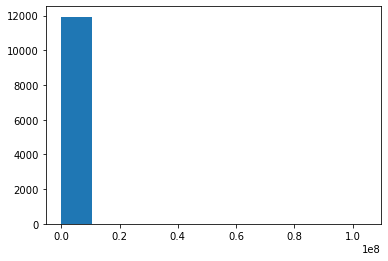

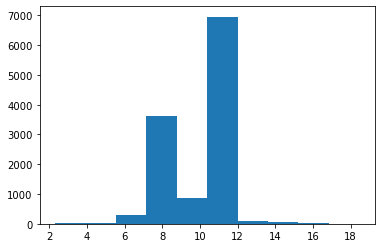

LTFRONT


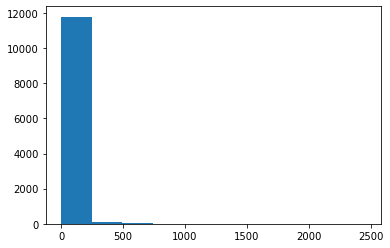

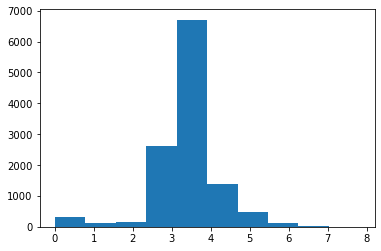

EXLAND2


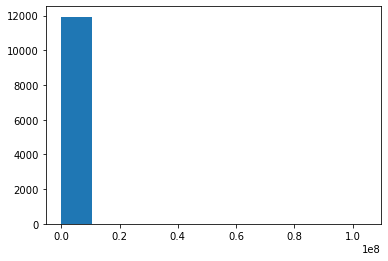

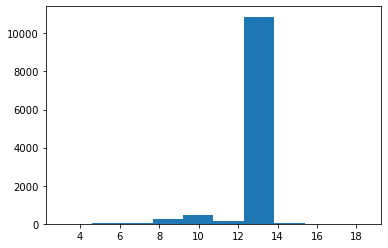

LTDEPTH


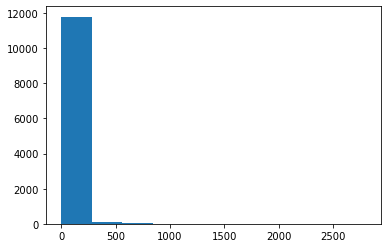

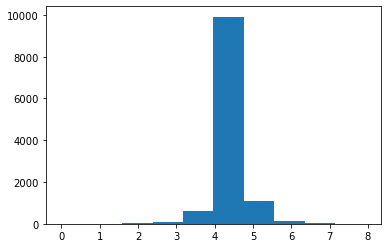

3-closest neighbour value


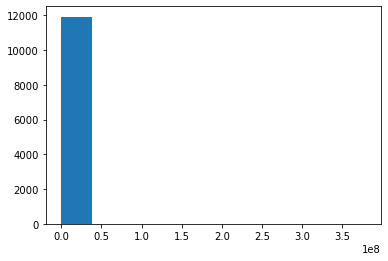

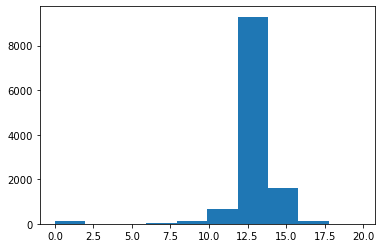

EXTOT2


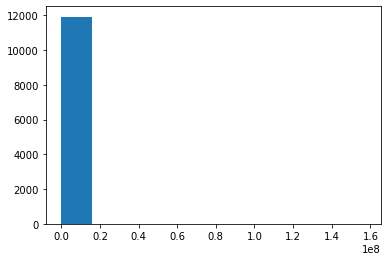

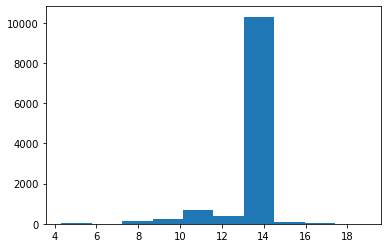

EXTOT


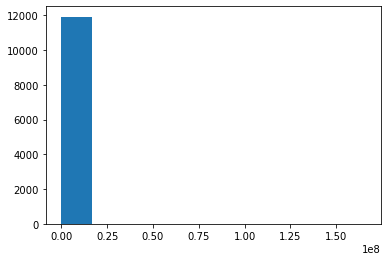

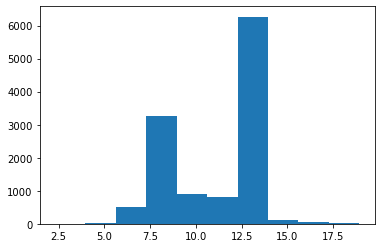

2-closest neighbour value per building area


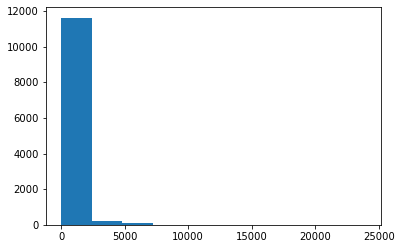

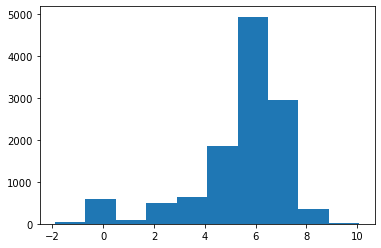

FULLVAL


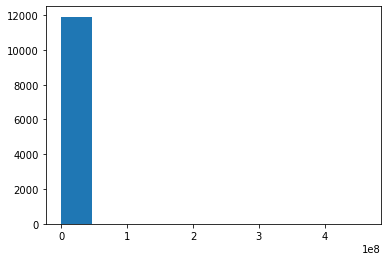

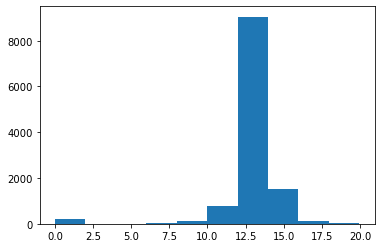

AVTOT


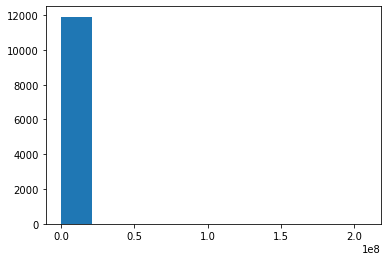

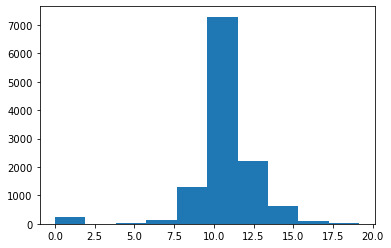

2-closest neighbour value


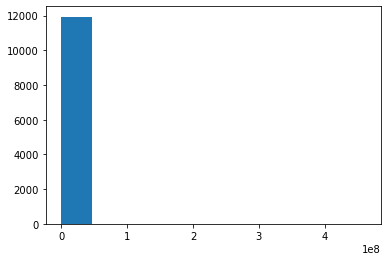

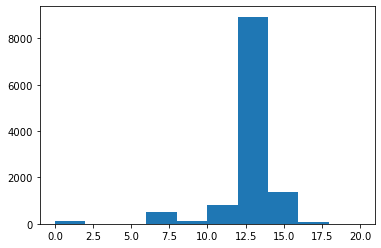

4-closest neighbour value per lot area


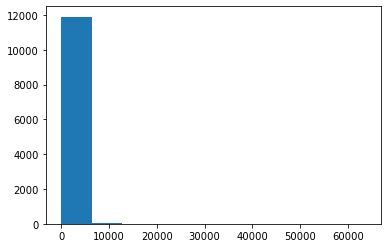

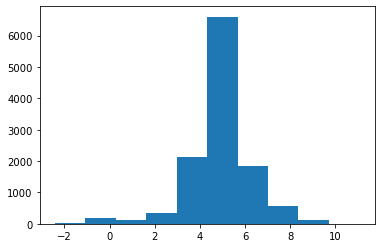

BLDFRONT


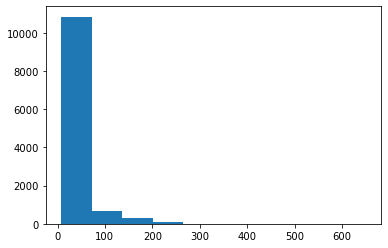

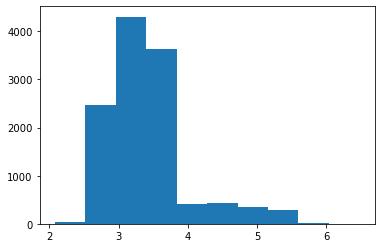

3-closest neighbour value per building area


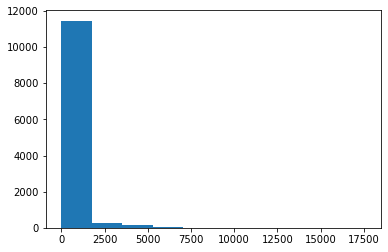

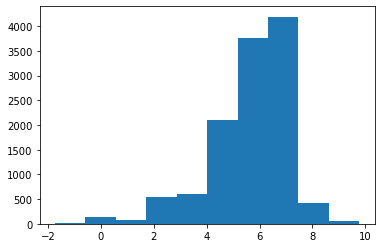

BLDDEPTH


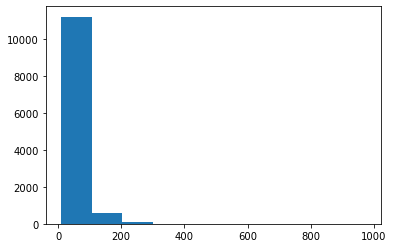

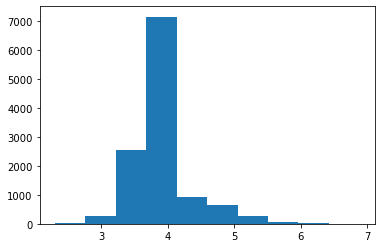

1-closest neighbour value per lot area


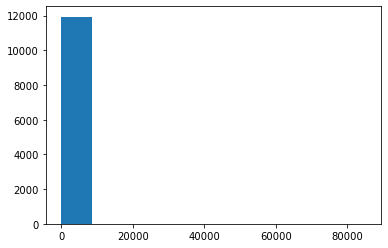

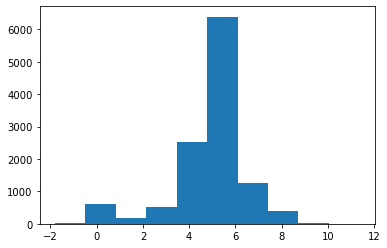

1-closest neighbour value


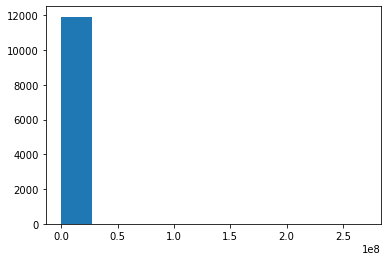

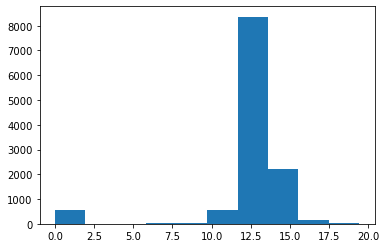

2-closest neighbour value per lot area


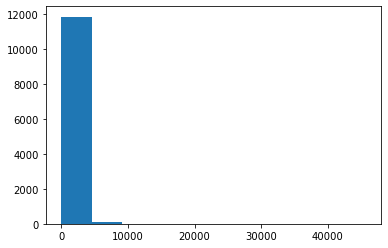

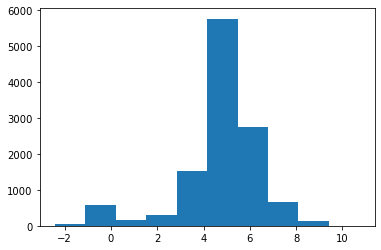

5-closest neighbour value per building area


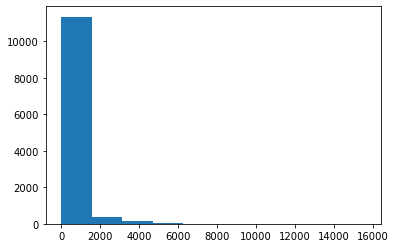

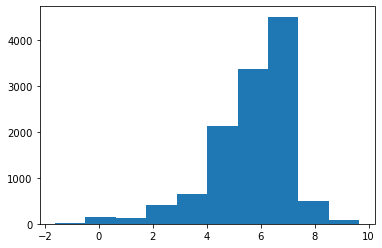

5-closest neighbour value per lot area


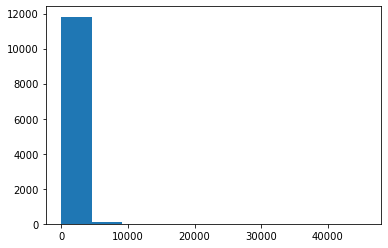

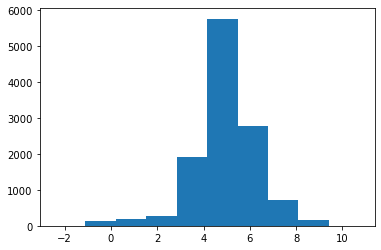

AVTOT2


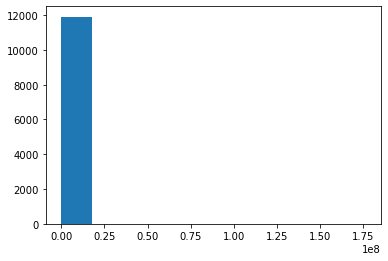

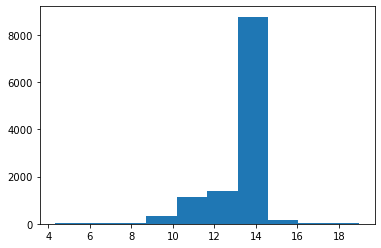

AVLAND


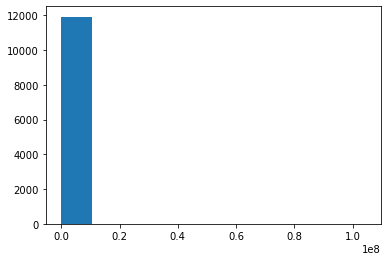

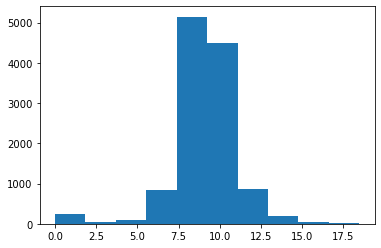

3-closest neighbour value per lot area


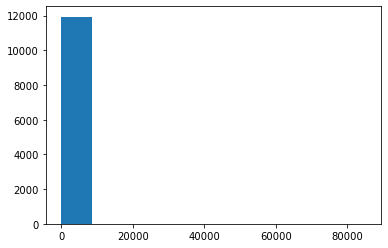

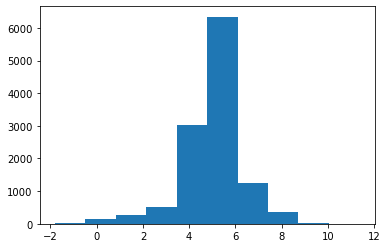

STORIES


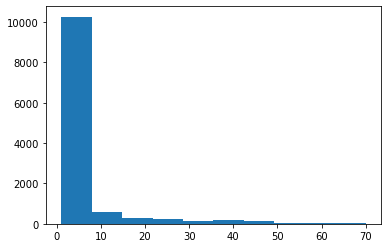

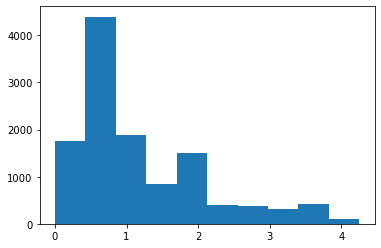

AVLAND2


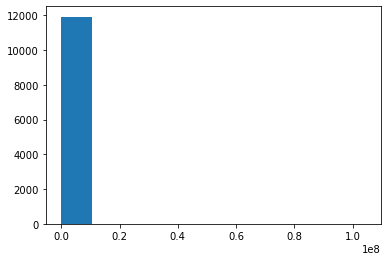

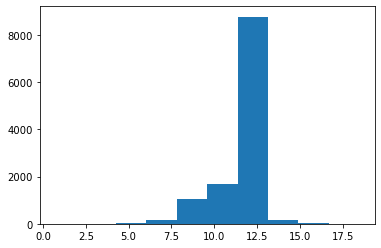

1-closest neighbour value per building area


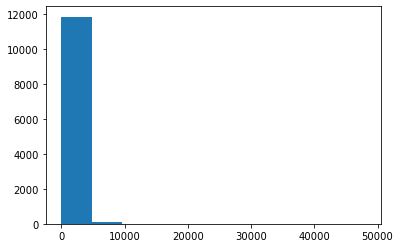

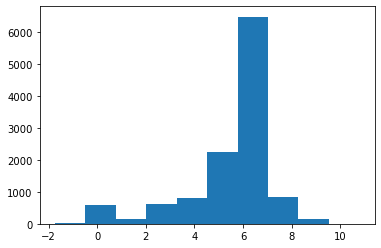

4-closest neighbour value per building area


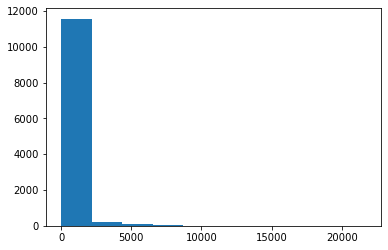

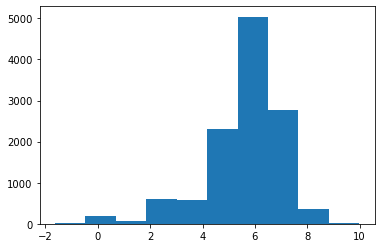

4-closest neighbour value


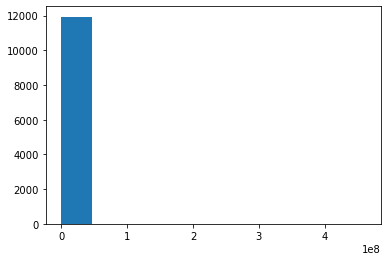

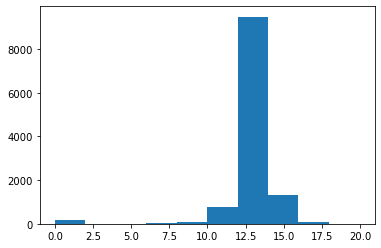

5-closest neighbour value


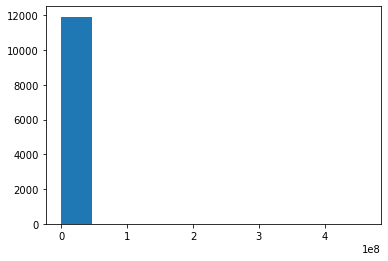

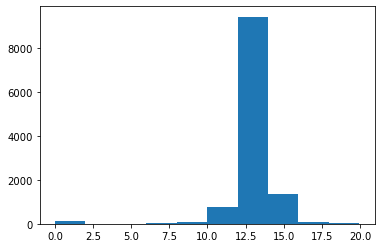

In [50]:
for column in numerical_columns:
    print(column)
    plt.hist(df[column])
    plt.show()
    plt.hist(standarizing.log_scale(df[column]))
    plt.show()

In [51]:
for column in numerical_columns:
    df.loc[:, column] = standarizing.log_scale(df.loc[:, column])

In [52]:
df.head()

BLDGCL TAXCLASS   LTFRONT   LTDEPTH      EXT   STORIES    FULLVAL  \
0     RK        4  3.825094  4.668648  nan_val  1.791759  15.057646   
1     R4        2  3.825094  4.668648  nan_val  3.135494  12.420313   
2     R4        2  3.825094  4.668648  nan_val  3.218876  12.062999   
3     R4        2  3.825094  4.668648  nan_val  3.295837  12.125676   
4     R4        2  3.825094  4.668648  nan_val  2.944439  13.235580   

      AVLAND      AVTOT     EXLAND  ...  \
0  11.678736  14.259138  11.498222  ...   
1   9.758520  11.621807   9.758520  ...   
2   9.332912  11.264490  11.498222  ...   
3   9.552582  11.327174   9.552582  ...   
4   9.222862  12.437073  11.498222  ...   

   1-closest neighbour value per building area  \
0                                     4.618223   
1                                     4.692098   
2                                     1.998933   
3                                     4.882664   
4                                     4.456022   

  2-closest neighbour value per building area  \
0                                    7.966907   
1                                    4.596824   
2                                    2.468935   
3                                    5.141572   
4                                    5.086640   

   3-closest neighbour value per building area  \
0                                     5.601849   
1                                     4.596824   
2                                     2.787391   
3                                     4.805085   
4                                     3.737237   

   4-closest neighbour value per building area  \
0                                     5.646174   
1                                     4.695034   
2                                     2.426378   
3                                     4.686699   
4                                     3.691522   

   5-closest neighbour value per building area  \
0                                     4.142933   
1                                     4.805374   
2                                     2.335407   
3                                     4.414963   
4                                     4.426555   

   1-closest neighbour value per lot area  \
0                                4.644152   
1                                3.909069   
2                                3.504716   
3                                4.099635   
4                                4.741838   

   2-closest neighbour value per lot area  \
0                                7.966907   
1                                3.813795   
2                                3.974718   
3                                4.358544   
4                                5.372455   

   3-closest neighbour value per lot area  \
0                                3.903371   
1                                3.813795   
2                                4.293174   
3                                4.022056   
4                                4.023053   

  4-closest neighbour value per lot area  \
0                               3.947696   
1                               3.912005   
2                               3.932161   
3                               3.903670   
4                               3.977338   

  5-closest neighbour value per lot area  
0                               3.359904  
1                               4.022346  
2                               3.841190  
3                               3.631934  
4                               4.712371  

[5 rows x 61 columns]

In [53]:
df.describe()

LTFRONT       LTDEPTH       STORIES       FULLVAL        AVLAND  \
count  11946.000000  11946.000000  11946.000000  11946.000000  11946.000000   
mean       3.468178      4.579584      1.168320     12.856940      9.043747   
std        0.852428      0.399954      0.917300      2.121408      1.983445   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.091042      4.605170      0.693147     12.634603      8.471620   
50%        3.637586      4.605170      0.693147     13.118355      9.174713   
75%        3.825094      4.668648      1.745351     13.478638      9.737979   
max        7.807103      7.937375      4.248495     19.951078     18.464175   

              AVTOT        EXLAND         EXTOT      BLDFRONT      BLDDEPTH  \
count  11946.000000  11946.000000  11946.000000  11946.000000  11946.000000   
mean      10.558349     10.009825     10.799201      3.408950      3.949162   
std        2.102483      1.983465      2.443282      0.592964      0.436211   
min        0.000000      2.302585      2.302585      2.079442      2.302585   
25%        9.936148      7.293018      7.803843      2.995732      3.688879   
50%       10.336892     11.498222     12.724475      3.258097      3.951244   
75%       11.479638     11.498222     12.724475      3.646918      4.063795   
max       19.152570     18.464175     18.927753      6.476972      6.881411   

       ...  1-closest neighbour value per building area  \
count  ...                                 11946.000000   
mean   ...                                     5.502401   
std    ...                                     1.811805   
min    ...                                    -1.742588   
25%    ...                                     4.870530   
50%    ...                                     6.145446   
75%    ...                                     6.534055   
max    ...                                    10.781237   

       2-closest neighbour value per building area  \
count                                 11946.000000   
mean                                      5.477561   
std                                       1.826603   
min                                      -1.903771   
25%                                       4.853775   
50%                                       6.145705   
75%                                       6.524981   
max                                      10.084348   

       3-closest neighbour value per building area  \
count                                 11946.000000   
mean                                      5.673082   
std                                       1.466135   
min                                      -1.742588   
25%                                       4.882746   
50%                                       6.136818   
75%                                       6.526521   
max                                       9.775664   

       4-closest neighbour value per building area  \
count                                 11946.000000   
mean                                      5.661242   
std                                       1.482227   
min                                      -1.635367   
25%                                       4.888045   
50%                                       6.131779   
75%                                       6.520867   
max                                       9.985474   

       5-closest neighbour value per building area  \
count                                 11946.000000   
mean                                      5.668486   
std                                       1.471536   
min                                      -1.635367   
25%                                       4.896621   
50%                                       6.143904   
75%                                       6.531191   
max                                       9.656727   

       1-closest neighbour value per lot area  \
count                            11946.000000   
mean      

In [54]:
df.to_csv('processed.csv', index=0)

# Standard scaling

In [55]:
df = pd.read_csv('processed.csv')
df.head()

BLDGCL TAXCLASS   LTFRONT   LTDEPTH      EXT   STORIES    FULLVAL  \
0     RK        4  3.825094  4.668648  nan_val  1.791759  15.057646   
1     R4        2  3.825094  4.668648  nan_val  3.135494  12.420313   
2     R4        2  3.825094  4.668648  nan_val  3.218876  12.062999   
3     R4        2  3.825094  4.668648  nan_val  3.295837  12.125676   
4     R4        2  3.825094  4.668648  nan_val  2.944439  13.235580   

      AVLAND      AVTOT     EXLAND  ...  \
0  11.678736  14.259138  11.498222  ...   
1   9.758520  11.621807   9.758520  ...   
2   9.332912  11.264490  11.498222  ...   
3   9.552582  11.327174   9.552582  ...   
4   9.222862  12.437073  11.498222  ...   

   1-closest neighbour value per building area  \
0                                     4.618223   
1                                     4.692098   
2                                     1.998933   
3                                     4.882664   
4                                     4.456022   

  2-closest neighbour value per building area  \
0                                    7.966907   
1                                    4.596824   
2                                    2.468935   
3                                    5.141572   
4                                    5.086640   

   3-closest neighbour value per building area  \
0                                     5.601849   
1                                     4.596824   
2                                     2.787391   
3                                     4.805085   
4                                     3.737237   

   4-closest neighbour value per building area  \
0                                     5.646174   
1                                     4.695034   
2                                     2.426378   
3                                     4.686699   
4                                     3.691522   

   5-closest neighbour value per building area  \
0                                     4.142933   
1                                     4.805374   
2                                     2.335407   
3                                     4.414963   
4                                     4.426555   

   1-closest neighbour value per lot area  \
0                                4.644152   
1                                3.909069   
2                                3.504716   
3                                4.099635   
4                                4.741838   

   2-closest neighbour value per lot area  \
0                                7.966907   
1                                3.813795   
2                                3.974718   
3                                4.358544   
4                                5.372455   

   3-closest neighbour value per lot area  \
0                                3.903371   
1                                3.813795   
2                                4.293174   
3                                4.022056   
4                                4.023053   

  4-closest neighbour value per lot area  \
0                               3.947696   
1                               3.912005   
2                               3.932161   
3                               3.903670   
4                               3.977338   

  5-closest neighbour value per lot area  
0                               3.359904  
1                               4.022346  
2                               3.841190  
3                               3.631934  
4                               4.712371  

[5 rows x 61 columns]

In [56]:
scaler, scaler_y, df = standarizing.fit_transform_on('processed.csv')
standarizing.save_scaler_as(scaler, 'standard_scaler.joblib')
standarizing.save_scaler_as(scaler_y, 'standard_scaler_y.joblib')

In [57]:
df.columns

Index(['BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL',
       'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'BLDFRONT', 'BLDDEPTH',
       'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'YEAR', 'Borough',
       'Community Board', 'Council District', 'Census Tract', 'NTA',
       'OWNER_RICHNESS', 'BIN_POPULARNESS', 'LTFRONT_WAS_NAN',
       'LTDEPTH_WAS_NAN', 'STORIES_WAS_NAN', 'EXLAND_WAS_NAN', 'EXTOT_WAS_NAN',
       'BLDFRONT_WAS_NAN', 'BLDDEPTH_WAS_NAN', 'AVLAND2_WAS_NAN',
       'AVTOT2_WAS_NAN', 'EXLAND2_WAS_NAN', 'EXTOT2_WAS_NAN',
       'Latitude_WAS_NAN', 'Longitude_WAS_NAN', 'LTAREA', 'BLDAREA',
       '1-closest neighbour value', '2-closest neighbour value',
       '3-closest neighbour value', '4-closest neighbour value',
       '5-closest neighbour value', '1-closest neighbour distance',
       '2-closest neighbour distance', '3-closest neighbour distance',
       '4-closest neighbour distance', '5-closest neighbour distance',
       '1-closest neighbo

In [58]:
df.to_csv('processed.csv', index=0)

# One Hot

In [59]:
df = pd.read_csv('processed.csv')
df.head()

BLDGCL TAXCLASS   LTFRONT   LTDEPTH      EXT   STORIES   FULLVAL    AVLAND  \
0     RK        4  0.418722  0.222695  nan_val  0.679674  1.037423  1.328547   
1     R4        2  0.418722  0.222695  nan_val  2.144616 -0.205828  0.360384   
2     R4        2  0.418722  0.222695  nan_val  2.235519 -0.374268  0.145795   
3     R4        2  0.418722  0.222695  nan_val  2.319422 -0.344722  0.256552   
4     R4        2  0.418722  0.222695  nan_val  1.936328  0.178492  0.090309   

      AVTOT    EXLAND  ...  1-closest neighbour value per building area  \
0  1.760273  0.750434  ...                                    -0.488030   
1  0.505832 -0.126706  ...                                    -0.447254   
2  0.335874  0.750434  ...                                    -1.933770   
3  0.365690 -0.230537  ...                                    -0.342069   
4  0.893611  0.750434  ...                                    -0.577558   

  2-closest neighbour value per building area  \
0                                    1.362886   
1                                   -0.482192   
2                                   -1.647184   
3                                   -0.183949   
4                                   -0.214024   

   3-closest neighbour value per building area  \
0                                    -0.048587   
1                                    -0.734109   
2                                    -1.968313   
3                                    -0.592056   
4                                    -1.320428   

   4-closest neighbour value per building area  \
0                                    -0.010166   
1                                    -0.651890   
2                                    -2.182527   
3                                    -0.657514   
4                                    -1.328948   

   5-closest neighbour value per building area  \
0                                    -1.036752   
1                                    -0.586562   
2                                    -2.265129   
3                                    -0.851883   
4                                    -0.844005   

   1-closest neighbour value per lot area  \
0                               -0.127162   
1                               -0.578521   
2                               -0.826803   
3                               -0.461508   
4                               -0.067181   

   2-closest neighbour value per lot area  \
0                                1.847311   
1                               -0.566311   
2                               -0.472789   
3                               -0.249725   
4                                0.339520   

   3-closest neighbour value per lot area  \
0                               -0.798116   
1                               -0.864887   
2                               -0.507552   
3                               -0.709646   
4                               -0.708903   

  4-closest neighbour value per lot area  \
0                              -0.755661   
1                              -0.781899   
2                              -0.767081   
3                              -0.788026   
4                              -0.733870   

  5-closest neighbour value per lot area  
0                              -1.206873  
1                              -0.716187  
2                              -0.850373  
3                              -1.005374  
4                              -0.205068  

[5 rows x 61 columns]

In [60]:
categorical_cols = ['BLDGCL', 'TAXCLASS', 'EXT', 'YEAR', 'Borough', 'Community Board', 'Council District',
                    'Census Tract', 'NTA', 'OWNER_RICHNESS', 'BIN_POPULARNESS', 'LTFRONT_WAS_NAN',
                    'LTDEPTH_WAS_NAN', 'STORIES_WAS_NAN', 'EXLAND_WAS_NAN', 'EXTOT_WAS_NAN',
                    'BLDFRONT_WAS_NAN', 'BLDDEPTH_WAS_NAN', 'AVLAND2_WAS_NAN',
                    'AVTOT2_WAS_NAN', 'EXLAND2_WAS_NAN', 'EXTOT2_WAS_NAN',
                    'Latitude_WAS_NAN', 'Longitude_WAS_NAN', 'EXCD1'
                   ]

In [61]:
one_hot_encoded = pd.get_dummies(df[categorical_cols])
one_hot_encoded.head()

LTFRONT_WAS_NAN  LTDEPTH_WAS_NAN  STORIES_WAS_NAN  EXLAND_WAS_NAN  \
0          1.98146         1.798936        -0.251564        0.879913   
1          1.98146         1.798936        -0.251564       -1.136476   
2          1.98146         1.798936        -0.251564        0.879913   
3          1.98146         1.798936        -0.251564       -1.136476   
4          1.98146         1.798936        -0.251564        0.879913   

   EXTOT_WAS_NAN  BLDFRONT_WAS_NAN  BLDDEPTH_WAS_NAN  AVLAND2_WAS_NAN  \
0       1.003354          1.711609          1.715014        -1.474079   
1      -0.996657          1.711609          1.715014        -1.474079   
2       1.003354         -0.584246         -0.583086        -1.474079   
3      -0.996657          1.711609          1.715014        -1.474079   
4       1.003354         -0.584246         -0.583086        -1.474079   

   AVTOT2_WAS_NAN  EXLAND2_WAS_NAN  ...  EXCD1_5101.0category  \
0       -1.474079         0.327160  ...                     0   
1       -1.474079        -3.056609  ...                     0   
2       -1.474079         0.327160  ...                     0   
3       -1.474079        -3.056609  ...                     0   
4       -1.474079         0.327160  ...                     0   

   EXCD1_5110.0category  EXCD1_5112.0category  EXCD1_5113.0category  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   EXCD1_5114.0category  EXCD1_5118.0category  EXCD1_5130.0category  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   EXCD1_6800.0category  EXCD1_nancategory  EXCD1_other  
0                     0                  1            0  
1                     1                  0            0  
2                     0                  1            0  
3                     1                  0            0  
4                     0                  1            0  

[5 rows x 372 columns]

In [62]:
df = df.drop(columns=categorical_cols)
df = pd.concat([df, one_hot_encoded], axis=1)

In [63]:
df.head()

LTFRONT   LTDEPTH   STORIES   FULLVAL    AVLAND     AVTOT    EXLAND  \
0  0.418722  0.222695  0.679674  1.037423  1.328547  1.760273  0.750434   
1  0.418722  0.222695  2.144616 -0.205828  0.360384  0.505832 -0.126706   
2  0.418722  0.222695  2.235519 -0.374268  0.145795  0.335874  0.750434   
3  0.418722  0.222695  2.319422 -0.344722  0.256552  0.365690 -0.230537   
4  0.418722  0.222695  1.936328  0.178492  0.090309  0.893611  0.750434   

      EXTOT  BLDFRONT  BLDDEPTH  ...  EXCD1_5101.0category  \
0  0.788020  0.401337  0.262802  ...                     0   
1  0.336695  0.401337  0.262802  ...                     0   
2  0.788020  2.433775  2.747254  ...                     0   
3  0.216101  0.401337  0.262802  ...                     0   
4  0.788020  0.848440  2.105427  ...                     0   

   EXCD1_5110.0category  EXCD1_5112.0category  EXCD1_5113.0category  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   EXCD1_5114.0category  EXCD1_5118.0category  EXCD1_5130.0category  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   EXCD1_6800.0category  EXCD1_nancategory  EXCD1_other  
0                     0                  1            0  
1                     1                  0            0  
2                     0                  1            0  
3                     1                  0            0  
4                     0                  1            0  

[5 rows x 408 columns]

In [64]:
df.to_csv('processed.csv', index=0)

<h1>Klasyfikator</h1>

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [68]:
df = pd.read_csv('processed.csv')
df.head()

LTFRONT   LTDEPTH   STORIES   FULLVAL    AVLAND     AVTOT    EXLAND  \
0  0.418722  0.222695  0.679674  1.037423  1.328547  1.760273  0.750434   
1  0.418722  0.222695  2.144616 -0.205828  0.360384  0.505832 -0.126706   
2  0.418722  0.222695  2.235519 -0.374268  0.145795  0.335874  0.750434   
3  0.418722  0.222695  2.319422 -0.344722  0.256552  0.365690 -0.230537   
4  0.418722  0.222695  1.936328  0.178492  0.090309  0.893611  0.750434   

      EXTOT  BLDFRONT  BLDDEPTH  ...  EXCD1_5101.0category  \
0  0.788020  0.401337  0.262802  ...                     0   
1  0.336695  0.401337  0.262802  ...                     0   
2  0.788020  2.433775  2.747254  ...                     0   
3  0.216101  0.401337  0.262802  ...                     0   
4  0.788020  0.848440  2.105427  ...                     0   

   EXCD1_5110.0category  EXCD1_5112.0category  EXCD1_5113.0category  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   EXCD1_5114.0category  EXCD1_5118.0category  EXCD1_5130.0category  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   EXCD1_6800.0category  EXCD1_nancategory  EXCD1_other  
0                     0                  1            0  
1                     1                  0            0  
2                     0                  1            0  
3                     1                  0            0  
4                     0                  1            0  

[5 rows x 408 columns]

<AxesSubplot:>

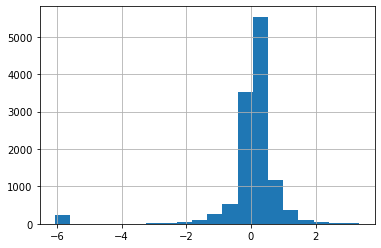

In [69]:
df['FULLVAL'].hist(bins=20)

In [70]:
(df['FULLVAL'] > 1.8).sum()

90

In [71]:
(df['FULLVAL'] < -1.8).sum()

328

In [84]:
df['OUTLIER'] = '0'
df.loc[df['FULLVAL'] < -1.8, 'OUTLIER'] = '<-1.8'
#df.loc[(df['FULLVAL'] < -1.0) & (df['FULLVAL'] >= -1.8), 'OUTLIER'] = '[-1.8, 1.0)'
#df.loc[(df['FULLVAL'] < 0.0) & (df['FULLVAL'] >= -1.0), 'OUTLIER'] = '[-1.0, 0.0)'
#df.loc[(df['FULLVAL'] < 0.5) & (df['FULLVAL'] >= 0.0), 'OUTLIER'] = '[0.0, 0.5)'
#df.loc[(df['FULLVAL'] < 1.0) & (df['FULLVAL'] >= 0.5), 'OUTLIER'] = '[0.5, 1.0)'
#df.loc[(df['FULLVAL'] < 1.5) & (df['FULLVAL'] >= 1.0), 'OUTLIER'] = '[1.0, 1.5)'
#df.loc[(df['FULLVAL'] < 1.8) & (df['FULLVAL'] >= 1.5), 'OUTLIER'] = '[1.5, 1.8)'
df.loc[df['FULLVAL'] > 1.8, 'OUTLIER'] = '>1.8'

In [85]:
rf_classifier = RandomForestClassifier()

In [86]:
X = df.drop(columns=['FULLVAL', 'OUTLIER'])
y = df['OUTLIER']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [88]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [89]:
preds = rf_classifier.predict(x_test)

In [90]:
confusion_matrix(y_test, preds)

array([[3460,    2,    3],
       [   3,   85,    0],
       [   5,    0,   26]], dtype=int64)

In [91]:
import os 
import joblib

In [92]:
joblib.dump(rf_classifier, 'rf_classifier.joblib')

['rf_classifier.joblib']

In [93]:
preds

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)